In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report



# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
from sklearn.metrics import precision_recall_curve

In [3]:

drive.mount('/content/drive')

# Read the excel file from google drive
dataset_path = '/content/drive/My Drive/UP/Assign/Leads.csv'

# Load the excel sheet using pandas
df = pd.read_csv(dataset_path)

# Display dataframe
df.head()

Mounted at /content/drive


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# **1. Understanding data**

In [4]:
# Inspect the different columns in the dataset
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Shape of the data
df.shape

(9240, 37)

In [6]:
#Checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Inference :** There are lot of columns with 'object' data type which may be categorical variables. There are 7 numerical columns and 30 categorical columns.

In [7]:
# Statistical summary of the dataset
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# Calculate the number of null values and the percentage
null_counts = df.isnull().sum()
percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Number of Nulls': null_counts, 'Percentage of Nulls': percentage})

# Sort the DataFrame based on 'Percentage of Nulls' in descending order
null_df_sorted = null_df.sort_values(by='Percentage of Nulls', ascending=False)

# Display the sorted DataFrame
null_df_sorted

Number of Nulls  \
Lead Quality                                              4767   
Asymmetrique Activity Index                               4218   
Asymmetrique Profile Score                                4218   
Asymmetrique Activity Score                               4218   
Asymmetrique Profile Index                                4218   
Tags                                                      3353   
Lead Profile                                              2709   
What matters most to you in choosing a course             2709   
What is your current occupation                           2690   
Country                                                   2461   
How did you hear about X Education                        2207   
Specialization                                            1438   
City                                                      1420   
Page Views Per Visit                                       137   
TotalVisits                                                137   
Last Activity                                              103   
Lead Source                                                 36   
Receive More Updates About Our Courses                       0   
I agree to pay the amount through cheque                     0   
Get updates on DM Content                                    0   
Update me on Supply Chain Content                            0   
A free copy of Mastering The Interview                       0   
Prospect ID                                                  0   
Newspaper Article                                            0   
Through Recommendations                                      0   
Digital Advertisement                                        0   
Newspaper                                                    0   
X Education Forums                                           0   
Lead Number                                                  0   
Magazine                                                     0   
Search                                                       0   
Total Time Spent on Website                                  0   
Converted                                                    0   
Do Not Call                                                  0   
Do Not Email                                                 0   
Lead Origin                                                  0   
Last Notable Activity                                        0   

                                               Percentage of Nulls  
Lead Quality                                             51.590909  
Asymmetrique Activity Index                              45.649351  
Asymmetrique Profile Score                               45.649351  
Asymmetrique Activity Score                              45.649351  
Asymmetrique Profile Index                               45.649351  
Tags                                                     36.287879  
Lead Profile                                             29.318182  
What matters most to you in choosing a course            29.318182  
What is your current occupation                          29.112554  
Country                                                  26.634199  
How did you hear about X Education                       23.885281  
Specialization                                           15.562771  
City                                                     15.367965  
Page Views Per Visit                                      1.482684  
TotalVisits                                               1.482684  
Last Activity                                             1.114719  
Lead Source                                               0.389610  
Receive More Updates About Our Courses                    0.000000  
I agree to pay the amount through cheque                  0.000000  
Get updates on DM Content                                 0.000000  
Update me on Supply Chain Content                         0.000000  
A free copy of Maste

In [9]:
# Create an empty dictionary to store the results
top_unique_values = {}

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Get the top 20 unique values for the column
    top_values = df[column].value_counts().head(20).index.tolist()
    # Add the results to the dictionary
    top_unique_values[column] = top_values

# Convert the dictionary to a DataFrame for a tabular display
top_unique_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in top_unique_values.items()]))

# Display the DataFrame
top_unique_df

Prospect ID              Lead Origin  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
1   22e9d4ef-d294-4ebf-81c7-7c7a1105aeea                      API   
2   46befc49-253a-419b-abea-2fd978d2e2b1            Lead Add Form   
3   9d35a2c2-09d8-439f-9875-0e8bbf267f5a              Lead Import   
4   f0de9371-4dc2-48c2-9785-a08d6fc4fcb5           Quick Add Form   
5   446a290f-b78f-413b-8912-d9c79a847e3a                      NaN   
6   38826741-ffe2-4d37-89c4-1140c66c5560                      NaN   
7   f08604ae-a2fa-4d64-8a42-a95ff2bddfed                      NaN   
8   ce9c2fa0-d2ff-493d-82a9-20c81b175b3e                      NaN   
9   13e3716d-528a-4e90-a441-51ab1d0184d1                      NaN   
10  0047124c-2a76-4c2d-b4e4-83cb2331dbec                      NaN   
11  9608eda6-d8bb-45ec-ab12-eb3c49d52b0f                      NaN   
12  07a52472-4b5d-446f-9048-ffdc7bc65e96                      NaN   
13  804e0cfb-559d-4a63-a635-573f7cfdf441                      NaN   
14  65954c34-8ce7-4d9b-8ae0-f15f15bc9055                      NaN   
15  e02efa11-5bf6-40ee-9194-75d3fffef1d3                      NaN   
16  297fd0fa-69e5-49cf-b794-94c103e388d7                      NaN   
17  f4217ab4-81fd-42d9-a9b4-f8bbfaf1578b                      NaN   
18  b3af7901-09d8-49b7-803f-1cd1e1e8878a                      NaN   
19  7bcca8a9-60ab-4a36-a7f9-cd85aeb10a70                      NaN   

          Lead Source Do Not Email Do Not Call                 Last Activity  \
0              Google           No          No                  Email Opened   
1      Direct Traffic          Yes         Yes                      SMS Sent   
2          Olark Chat          NaN         NaN       Olark Chat Conversation   
3      Organic Search          NaN         NaN       Page Visited on Website   
4           Reference          NaN         NaN             Converted to Lead   
5    Welingak Website          NaN         NaN                 Email Bounced   
6      Referral Sites          NaN         NaN            Email Link Clicked   
7            Facebook          NaN         NaN     Form Submitted on Website   
8                bing          NaN         NaN                   Unreachable   
9              google          NaN         NaN                  Unsubscribed   
10         Click2call          NaN         NaN      Had a Phone Conversation   
11      Press_Release          NaN         NaN            Approached upfront   
12       Social Media          NaN         NaN  View in browser link Clicked   
13          Live Chat          NaN         NaN                Email Received   
14     youtubechannel          NaN         NaN             Email Marked Spam   
15            testone          NaN         NaN    Visited Booth in Tradeshow   
16  Pay per Click Ads          NaN         NaN        Resubscribed to emails   
17   welearnblog_Home          NaN         NaN                           NaN   
18            WeLearn          NaN         NaN                           NaN   
19               blog          NaN         NaN                           NaN   

                 Country                     Specialization  \
0                  India                             Select   
1          United States                 Finance Management   
2   United Arab Emirates          Human Resource Management   
3              Singapore               Marketing Management   
4           Saudi Arabia              Operations Management   
5         United Kingdom            Business Administration   
6              Australia             IT Projects Management   
7                  Qatar            Supply Chain Management   
8              Hong Kong  Banking, Investment And Insurance   
9                Bahrain                 Travel and Tourism   
10                  Oman              Media and Advertising   
11                France             International Business   
12               unknown              Healthcare Management   
13          Sout

**Inference:** As expected there are lot of "NaN" values along with "Select" values across multiple columns.

In [10]:
# Create an empty dictionary to store the counts
select_counts = {}

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Count the occurrences of the value "Select" in the column
    count = (df[column] == "Select").sum()
    # Add the count to the dictionary
    select_counts[column] = count

# Convert the dictionary to a DataFrame for a tabular display
select_counts_df = pd.DataFrame(list(select_counts.items()), columns=['Column Name', 'Count of "Select"'])

# Display the DataFrame
select_counts_df


Column Name  Count of "Select"
0                                     Prospect ID                  0
1                                     Lead Origin                  0
2                                     Lead Source                  0
3                                    Do Not Email                  0
4                                     Do Not Call                  0
5                                   Last Activity                  0
6                                         Country                  0
7                                  Specialization               1942
8              How did you hear about X Education               5043
9                 What is your current occupation                  0
10  What matters most to you in choosing a course                  0
11                                         Search                  0
12                                       Magazine                  0
13                              Newspaper Article                  0
14                             X Education Forums                  0
15                                      Newspaper                  0
16                          Digital Advertisement                  0
17                        Through Recommendations                  0
18         Receive More Updates About Our Courses                  0
19                                           Tags                  0
20                                   Lead Quality                  0
21              Update me on Supply Chain Content                  0
22                      Get updates on DM Content                  0
23                                   Lead Profile               4146
24                                           City               2249
25                    Asymmetrique Activity Index                  0
26                     Asymmetrique Profile Index                  0
27       I agree to pay the amount through cheque                  0
28         A free copy of Mastering The Interview                  0
29                          Last Notable Activity                  0

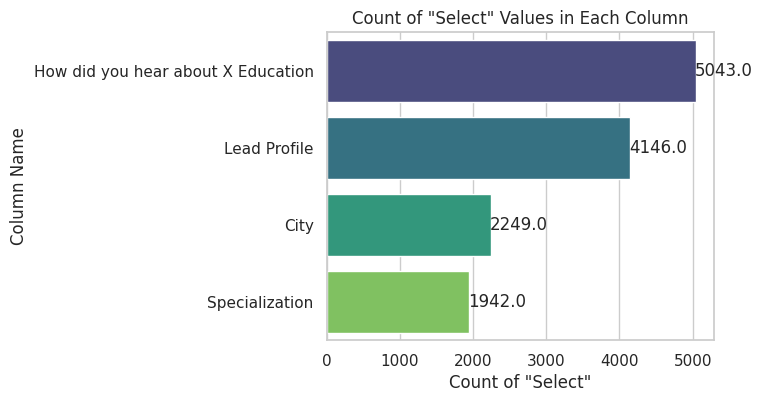

In [11]:
# Let's check count of "Select" in each each column of "object" datatype
# Create an empty dictionary to store the counts
select_counts = {}

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Count the occurrences of the value "Select" in the column
    count = (df[column] == "Select").sum()
    # Add the count to the dictionary if it's non-zero
    if count > 0:
        select_counts[column] = count

# Convert the dictionary to a DataFrame for plotting
select_counts_df = pd.DataFrame(list(select_counts.items()), columns=['Column Name', 'Count of "Select"'])

# Sort the DataFrame based on the count in descending order
select_counts_df_sorted = select_counts_df.sort_values(by='Count of "Select"', ascending=False)

# Set the color theme for the seaborn bar chart
sns.set_theme(style="whitegrid")

# Plotting the bar chart
plt.figure(figsize=(5, 4))
bar_plot = sns.barplot(x='Count of "Select"', y='Column Name', data=select_counts_df_sorted, palette='viridis')

# Adding the count labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.1f'),
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha = 'center', va = 'center',
                      xytext = (20, 0),
                      textcoords = 'offset points')

plt.xlabel('Count of "Select"')
plt.ylabel('Column Name')
plt.title('Count of "Select" Values in Each Column')
plt.show()


**Inference: ** Select doesn't mean anything. So it's better to convert it to "NaN".

In [12]:
# Impute 'Select' with NaN'
df = df.replace('Select', np.nan)

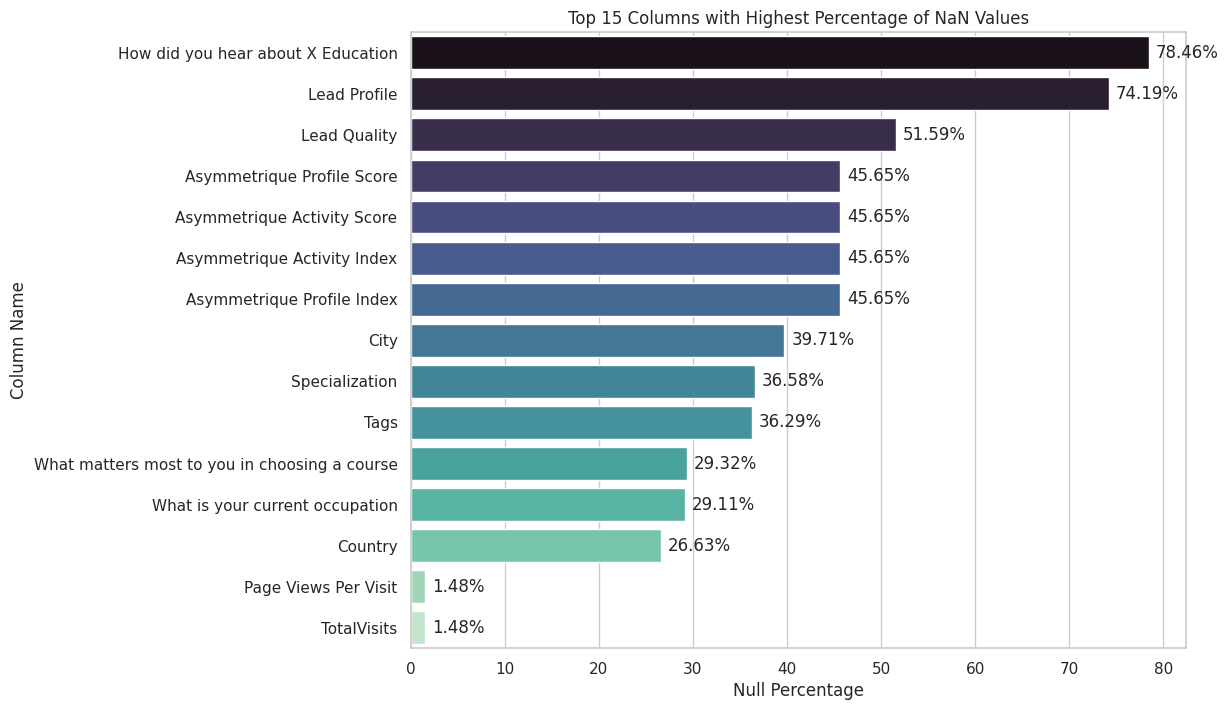

In [13]:
# Will check columns with more "Nan" values
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the columns based on the percentage of null values in descending order
sorted_null_percentage = null_percentage.sort_values(ascending=False).head(15)

# Convert the Series to a DataFrame for plotting
null_percentage_df = pd.DataFrame(sorted_null_percentage).reset_index()
null_percentage_df.columns = ['Column Name', 'Null Percentage']

# Set the color theme for the seaborn bar chart
sns.set_theme(style="whitegrid")

# Plotting the bar chart
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='Null Percentage', y='Column Name', data=null_percentage_df, palette='mako')

# Adding the percentage labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f') + '%',
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha = 'left', va = 'center',
                      xytext = (5, 0),
                      textcoords = 'offset points')

plt.xlabel('Null Percentage')
plt.ylabel('Column Name')
plt.title('Top 15 Columns with Highest Percentage of NaN Values')
plt.show()


In [14]:
# We can drop the columns with missing values greater than 40% .
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Find the columns with more than 40% null values
columns_to_drop = null_percentage[null_percentage > 40].index.tolist()

# Drop these columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

In [15]:
# Calculate the number of null values and the percentage
null_counts = df_dropped.isnull().sum()
percentage = (df_dropped.isnull().sum() / len(df_dropped)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Number of Nulls': null_counts, 'Percentage of Nulls': percentage})

# Filter the DataFrame to include only columns with null value percentage greater than 0
columns_with_nulls = null_df[null_df['Percentage of Nulls'] > 0.00]

# Sort the DataFrame based on 'Percentage of Nulls' in descending order
null_df_sorted = columns_with_nulls.sort_values(by='Percentage of Nulls', ascending=False)

# Get the list of columns with null value percentage greater than 0
columns_list = columns_with_nulls.index.tolist()
print("Columns with null value percentage greater than 0.00%:", columns_list)

# Display the sorted DataFrame
null_df_sorted

Columns with null value percentage greater than 0.00%: ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


Number of Nulls  \
City                                                      3669   
Specialization                                            3380   
Tags                                                      3353   
What matters most to you in choosing a course             2709   
What is your current occupation                           2690   
Country                                                   2461   
TotalVisits                                                137   
Page Views Per Visit                                       137   
Last Activity                                              103   
Lead Source                                                 36   

                                               Percentage of Nulls  
City                                                     39.707792  
Specialization                                           36.580087  
Tags                                                     36.287879  
What matters most to you in choosing a course            29.318182  
What is your current occupation                          29.112554  
Country                                                  26.634199  
TotalVisits                                               1.482684  
Page Views Per Visit                                      1.482684  
Last Activity                                             1.114719  
Lead Source                                               0.389610

In [16]:
df_dropped[columns_list ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 5860 non-null   object 
 6   What is your current occupation                6550 non-null   object 
 7   What matters most to you in choosing a course  6531 non-null   object 
 8   Tags                                           5887 non-null   object 
 9   City                                           5571 

In [17]:
# Calculate the number of null values and the percentage
null_counts = df_dropped.isnull().sum()
percentage = (df_dropped.isnull().sum() / len(df_dropped)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Number of Nulls': null_counts, 'Percentage of Nulls': percentage})

# Add a column for data types of each column in the DataFrame
null_df['Data Type'] = df_dropped.dtypes

# Filter the DataFrame to include only columns with null value percentage greater than 0
columns_with_nulls = null_df[null_df['Percentage of Nulls'] > 0.00]

# Sort the DataFrame based on 'Percentage of Nulls' in descending order
null_df_sorted = columns_with_nulls.sort_values(by='Percentage of Nulls', ascending=False)

# Get the list of columns with null value percentage greater than 0
columns_list = columns_with_nulls.index.tolist()

# Separate the columns by data type
numerical_null_columns = [col for col in columns_list if pd.api.types.is_numeric_dtype(df_dropped[col])]
categorical_null_columns = [col for col in columns_list if pd.api.types.is_object_dtype(df_dropped[col])]

# Print the lists of numerical and categorical columns
print("Numerical columns with null value percentage greater than 0.00%:", numerical_null_columns)
print("Categorical columns with null value percentage greater than 0.00%:", categorical_null_columns)

# Display the sorted DataFrame with data types
null_df_sorted

Numerical columns with null value percentage greater than 0.00%: ['TotalVisits', 'Page Views Per Visit']
Categorical columns with null value percentage greater than 0.00%: ['Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


Number of Nulls  \
City                                                      3669   
Specialization                                            3380   
Tags                                                      3353   
What matters most to you in choosing a course             2709   
What is your current occupation                           2690   
Country                                                   2461   
TotalVisits                                                137   
Page Views Per Visit                                       137   
Last Activity                                              103   
Lead Source                                                 36   

                                               Percentage of Nulls Data Type  
City                                                     39.707792    object  
Specialization                                           36.580087    object  
Tags                                                     36.287879    object  
What matters most to you in choosing a course            29.318182    object  
What is your current occupation                          29.112554    object  
Country                                                  26.634199    object  
TotalVisits                                               1.482684   float64  
Page Views Per Visit                                      1.482684   float64  
Last Activity                                             1.114719    object  
Lead Source                                               0.389610    object

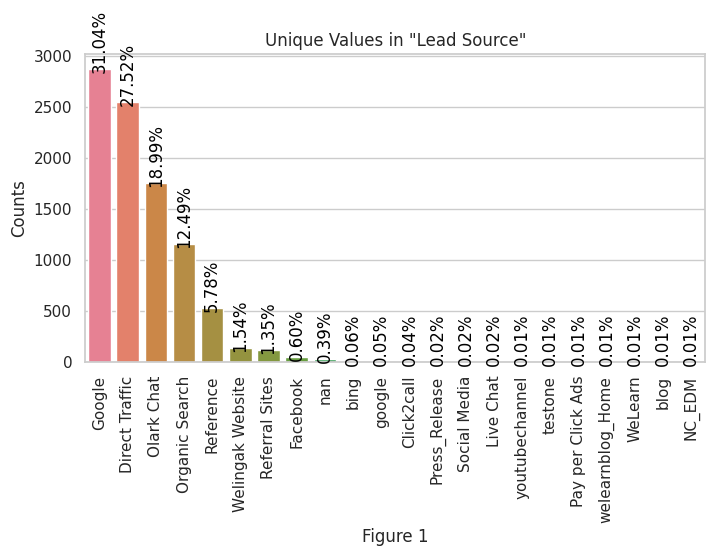

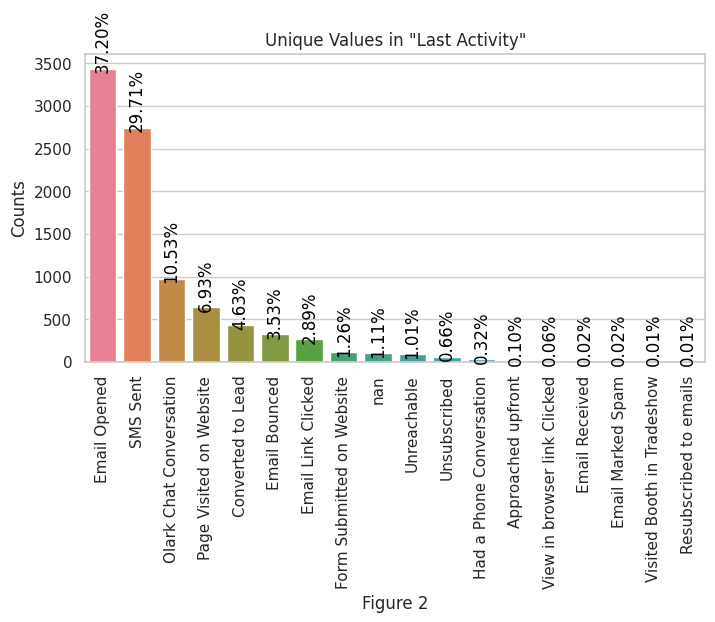

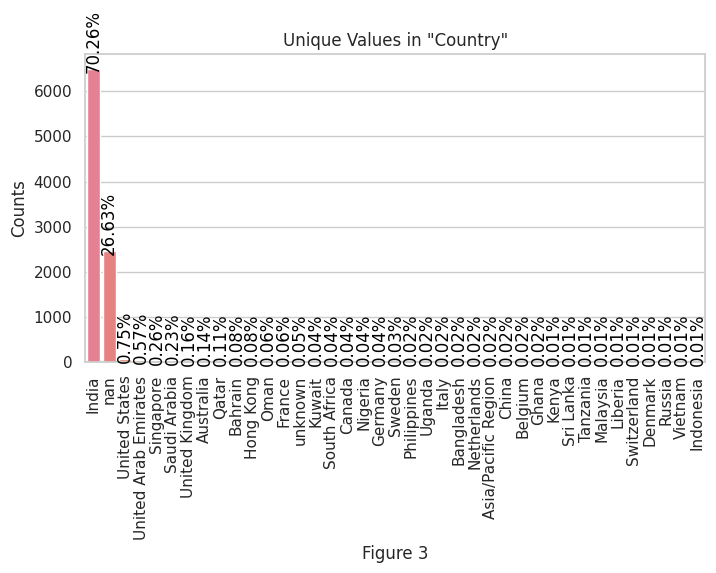

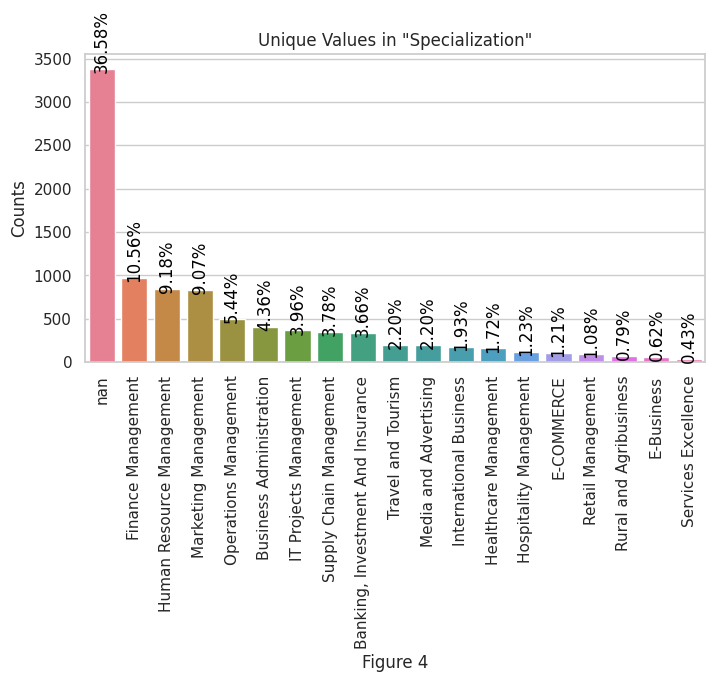

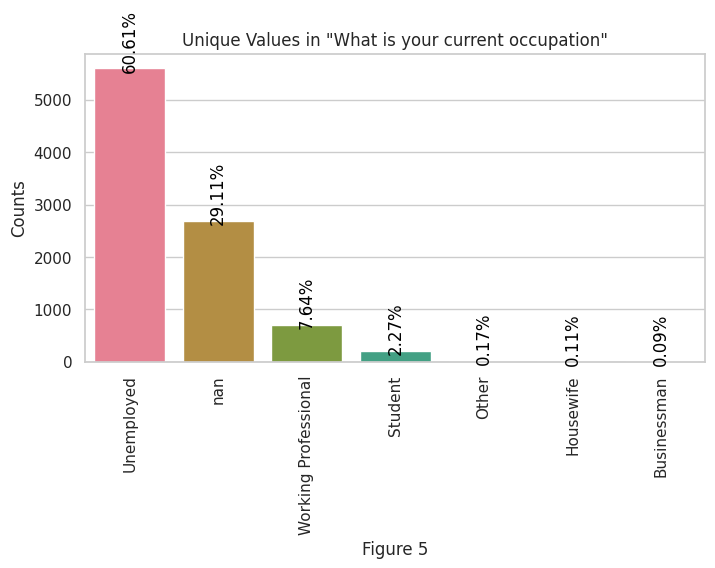

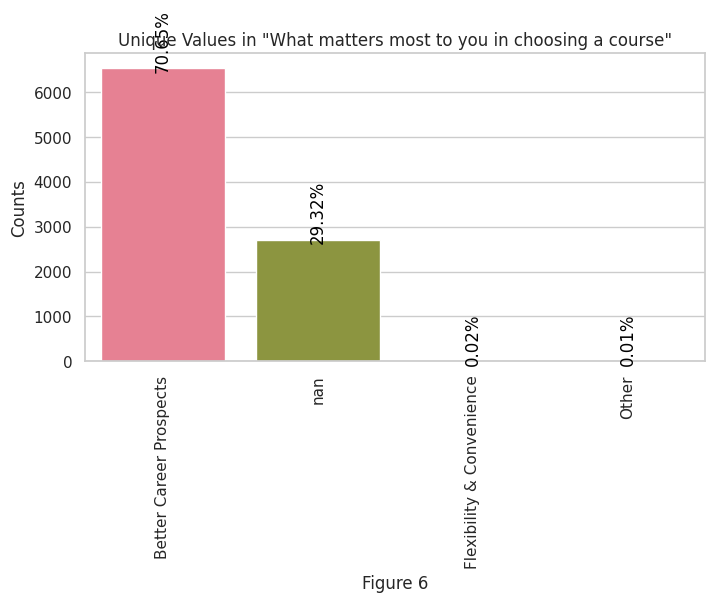

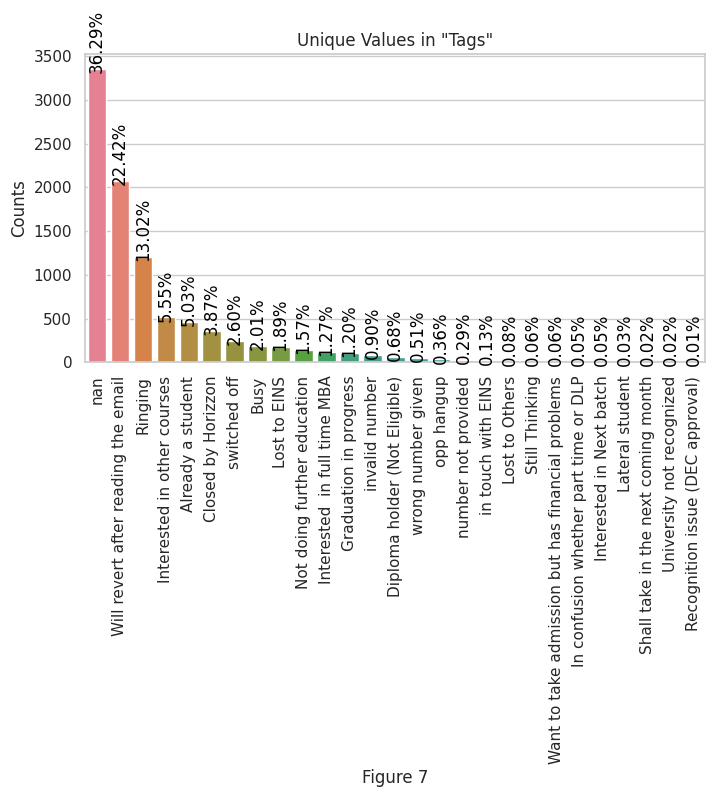

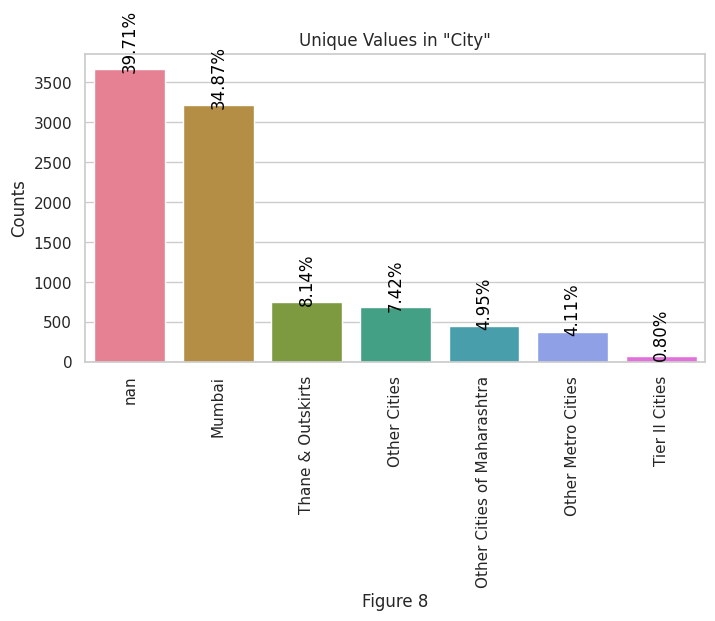

In [18]:
# Counter
count = 1

# Plotting unique values and their counts for each categorical column, including NaN values
for col in categorical_null_columns:
    # Calculate the value counts for the column, including NaN values
    value_counts = df_dropped[col].value_counts(dropna=False)

    # Generate a color palette
    colors = sns.color_palette('husl', n_colors=len(value_counts))

    # Create a bar plot for the value counts using Seaborn
    plt.figure(figsize=(8, 4))
    barplot = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=colors)

    # Set the title and labels
    plt.title(f'Unique Values in "{col}"')
    plt.xlabel(f'Figure {count}')
    plt.ylabel('Counts')

    # Increment count value
    count += 1

    # Rotate x-labels for better readability if there are many unique values
    plt.xticks(rotation=90)

    # Annotate the percentage of null values on the bars
    total = len(df_dropped[col])  # Total number of entries in the column
    for index, value in enumerate(value_counts.values):
        # Calculate the percentage of nulls
        percentage = (value / total) * 100
        # Annotate the percentage on the bars, rotated 90 degrees for readability
        plt.text(index, value, f'{percentage:.2f}%', color='black', ha="center", rotation=90)

    # Show the plot
    plt.show()

**Inferences:**


*   Figure 1: There are "NaN"(0.39%) and two 'Google' and 'google' values.
*   Figure 2: Last activity of leads  are having missing values(1.11%).
*   Figure 3:  'Country' has 26.63% missing values.
*   Figure 4: The "Specialization" column contains 37% missing values.If the lead is a student, does not have a specialty, or if his specialty is not included among the alternatives, it is probable that he will leave this section blank. Thus, for this, we can make a new category called "Others."
*   Figure 5: This column has 29.11% missing values.
*   Figure 6: This column is highly skewed and has 29.32% missing values.This column can be removed
*   Figure 7:  'Tags' column has 36.29% missing values.
*   Figure 8: 'City' column has 39.71% missing values



In [19]:
# Impute values with most occuring data in categorical columns, drop column 'What matters most to you in choosing a course' as data is highly skewed
# Drop the 'What matters most to you in choosing a course' column
df_dropped.drop('What matters most to you in choosing a course', axis=1, inplace=True)

# Update the 'categorical_null_columns' list after dropping the column
categorical_null_columns.remove('What matters most to you in choosing a course')

# Replace missing values in 'Specialization' column with 'Others'
df_dropped['Specialization'].fillna('Others', inplace=True)

# Replace "NaN" values with the most occurring value in each categorical column
for column in categorical_null_columns:
    if column != 'Specialization':  # We've already filled 'Specialization'
        most_common = df_dropped[column].mode()[0]
        df_dropped[column].fillna(most_common, inplace=True)

# Convert 'google' to 'Google' in the 'Last Activity' column
df_dropped['Last Activity'] = df_dropped['Last Activity'].replace('google','Google')

In [20]:
# Replacing "NaN" values with median values from numerical_null_columns
for col in numerical_null_columns:
    df_dropped[col].fillna(df_dropped[col].median(), inplace=True)


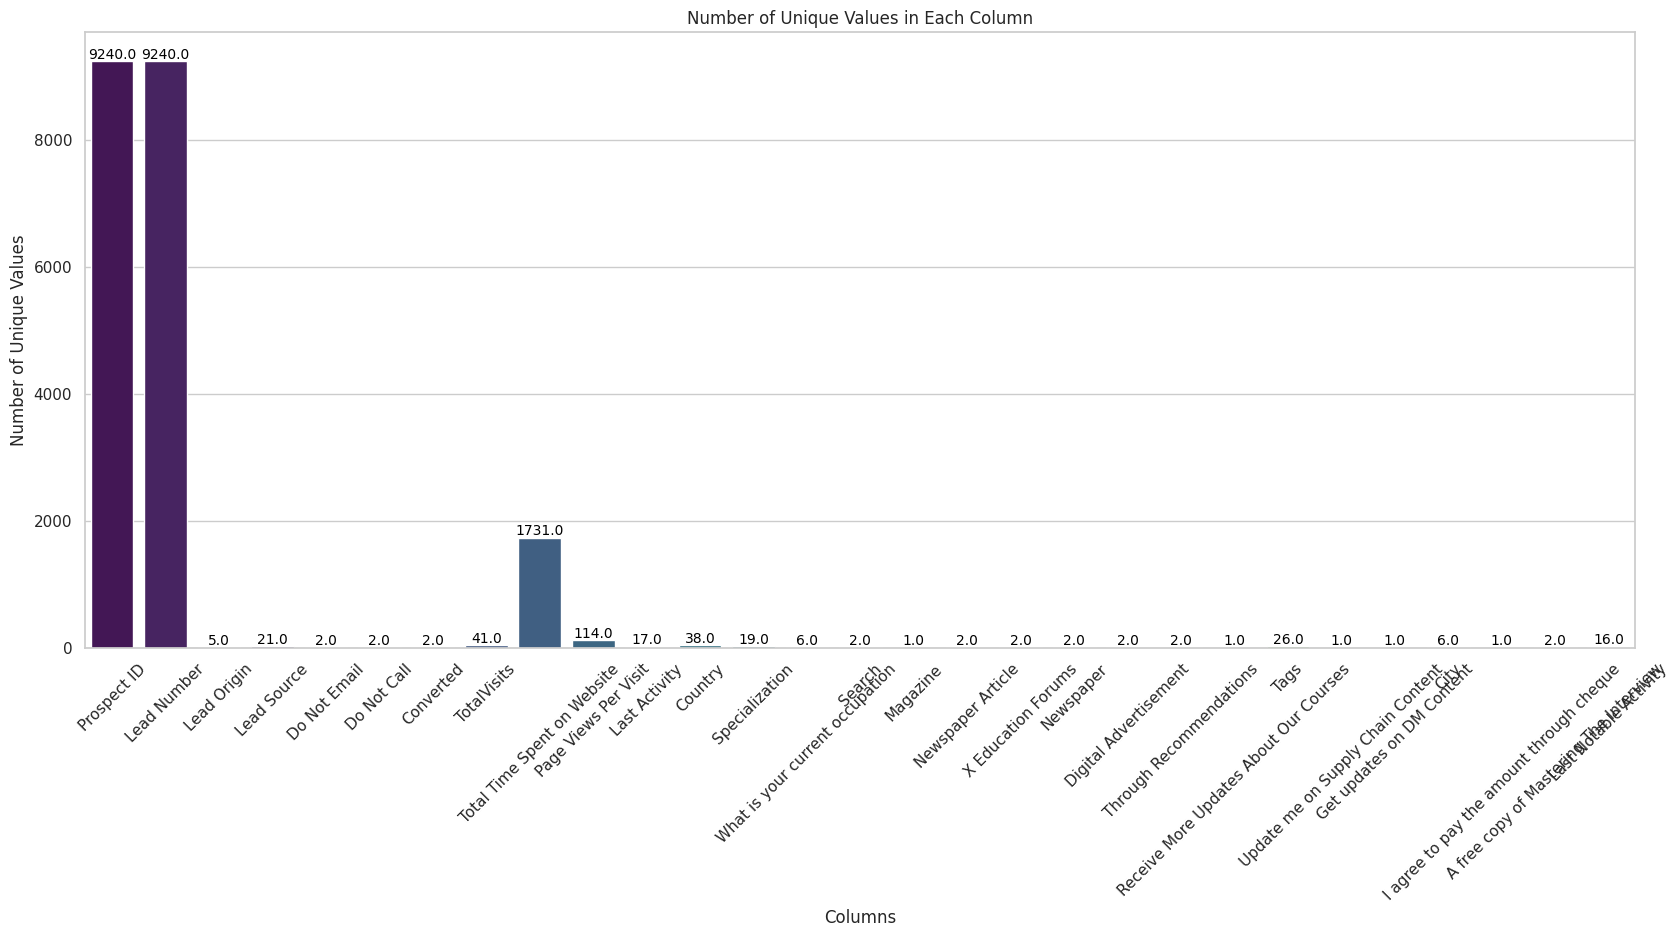

Columns with only 1 unique value: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [21]:
# Function to count unique values in each column and plot
def plot_unique_values(df):
    unique_counts = df.nunique()
    columns_with_one_unique_value = unique_counts[unique_counts == 1].index.tolist()

    plt.figure(figsize=(20, 8))
    ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
    ax.set_xlabel('Columns')
    ax.set_ylabel('Number of Unique Values')
    ax.set_title('Number of Unique Values in Each Column')

    # Annotate bars with the number of unique values
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xticks(rotation=45)
    plt.show()

    return columns_with_one_unique_value

# Plot and get columns with only 1 unique value
columns_with_one_unique_value = plot_unique_values(df_dropped)
print("Columns with only 1 unique value:", columns_with_one_unique_value)

**Inferences:**


*   Columns with only 1 unique value are having highly skewed data and are not essential for our model
*   'Prospect ID' and 'Lead Number' both do not have duplicate values  and will not make any significant impact on our model



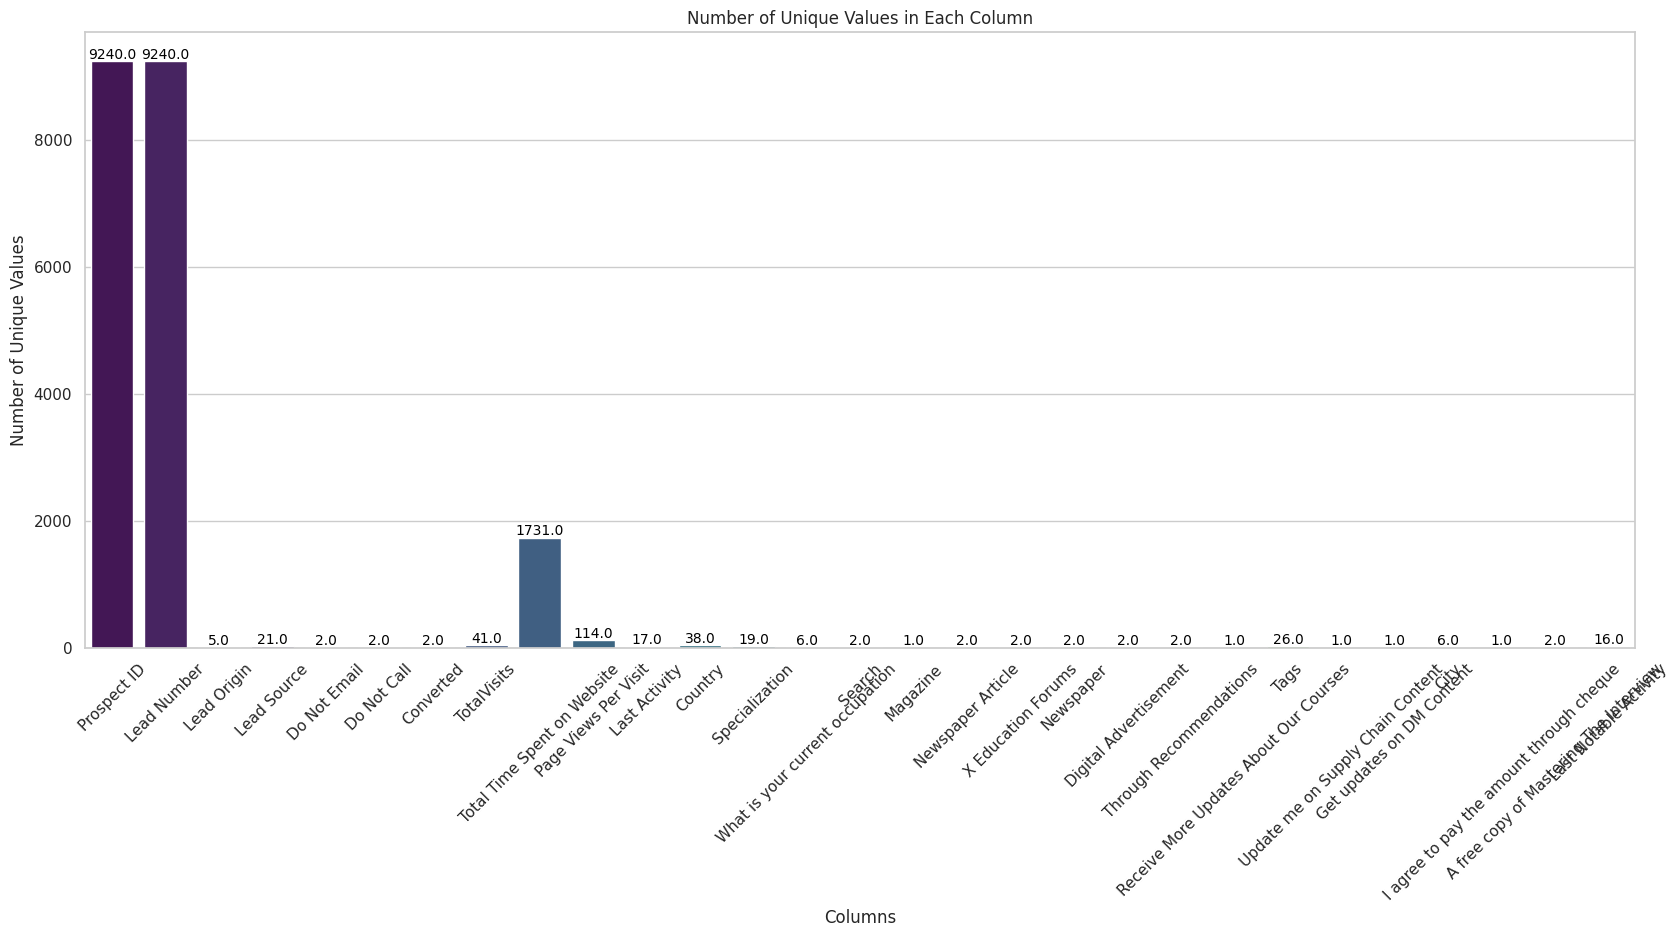

Columns with only 1 unique value: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
Columns with 2 unique values: ['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
Columns with more than 5 and less than 10 unique values: ['What is your current occupation', 'City']
Columns with more than 10 and less than 25 unique values: ['Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity']
Columns with more than 25 and less than 50 unique values: ['TotalVisits', 'Country', 'Tags']
Columns with more than 50 unique values: ['Prospect ID', 'Lead Number', 'Total Time Spent on Website', 'Page Views Per Visit']


In [22]:

# Function to count unique values in each column and plot
def plot_unique_values(df):
    unique_counts = df.nunique()
    columns_with_one_unique_value = unique_counts[unique_counts == 1].index.tolist()
    columns_with_2_unique_values = unique_counts[(unique_counts == 2)].index.tolist()
    columns_between_5_and_10_unique_values = unique_counts[(unique_counts > 5) & (unique_counts < 10)].index.tolist()
    columns_between_10_and_25_unique_values = unique_counts[(unique_counts >= 10) & (unique_counts < 25)].index.tolist()
    columns_between_25_and_50_unique_values = unique_counts[(unique_counts >= 25) & (unique_counts < 50)].index.tolist()
    columns_above_50_unique_values = unique_counts[unique_counts >= 50].index.tolist()

    plt.figure(figsize=(20, 8))
    ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
    ax.set_xlabel('Columns')
    ax.set_ylabel('Number of Unique Values')
    ax.set_title('Number of Unique Values in Each Column')

    # Annotate bars with the number of unique values
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xticks(rotation=45)
    plt.show()

    return columns_with_one_unique_value, columns_with_2_unique_values, \
           columns_between_5_and_10_unique_values, columns_between_10_and_25_unique_values, \
           columns_between_25_and_50_unique_values, columns_above_50_unique_values

# Plot and get columns with only 1 unique value
columns_with_one_unique_value, columns_with_2_unique_values, \
columns_between_5_and_10_unique_values, columns_between_10_and_25_unique_values, \
columns_between_25_and_50_unique_values, columns_above_50_unique_values = plot_unique_values(df_dropped)

print("Columns with only 1 unique value:", columns_with_one_unique_value)
print("Columns with 2 unique values:", columns_with_2_unique_values)
print("Columns with more than 5 and less than 10 unique values:", columns_between_5_and_10_unique_values)
print("Columns with more than 10 and less than 25 unique values:", columns_between_10_and_25_unique_values)
print("Columns with more than 25 and less than 50 unique values:", columns_between_25_and_50_unique_values)
print("Columns with more than 50 unique values:", columns_above_50_unique_values)


In [23]:
# List to stores names of columns that can be dropped
cols_to_drop = []

# add contents of list 'columns_with_one_unique_value' to list 'cols_to_drop'
cols_to_drop = cols_to_drop + columns_with_one_unique_value

In [24]:
# Function to analyze unique values and its counts graphically
def visualize_unique_values(df, columns):
    for col in columns:
        unique_values = df[col].value_counts().reset_index()
        unique_values.columns = [col, 'Count']

        if len(df[col].unique()) < 50:
          plt.figure(figsize=(10, 6))
          ax = sns.barplot(x=col, y='Count', data=unique_values, palette='viridis')
          ax.set_xlabel(col)
          ax.set_ylabel('Count')
          ax.set_title(f'Unique Values Count for {col}')

          # Annotate bars with the count of each unique value
          for p in ax.patches:
              ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                          textcoords='offset points')

          plt.xticks(rotation=45)
          plt.show()

        if len(df[col].unique()) > 2  :
            # Skewness curve diagram
            plt.figure(figsize=(10, 6))
            sns.histplot(df[col], kde=True, color='skyblue', bins=20)
            plt.title(f'Skewness Curve for {col}')
            plt.xlabel(col)
            plt.xticks(rotation=45)
            plt.ylabel('Frequency')

            plt.show()

        print("_________________________________________________________________________________________________________________\n\n\n")



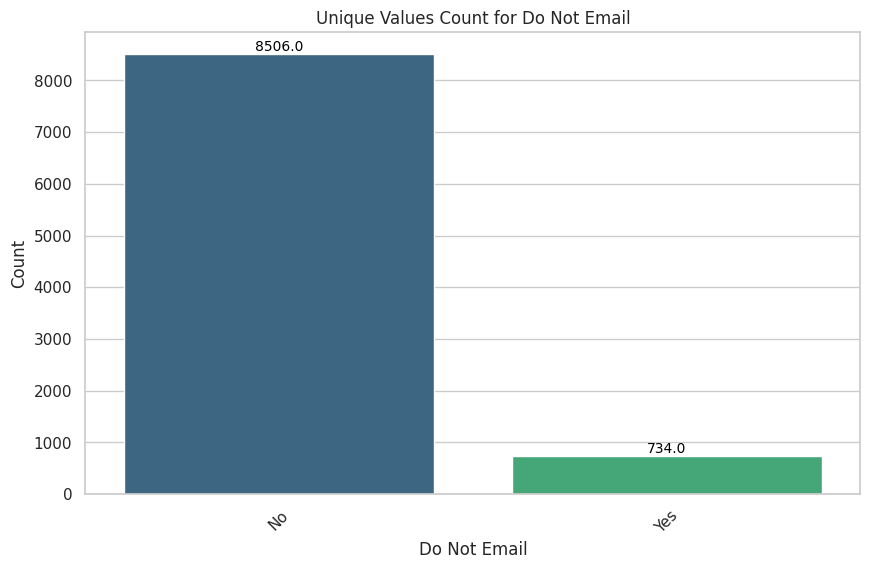

_________________________________________________________________________________________________________________





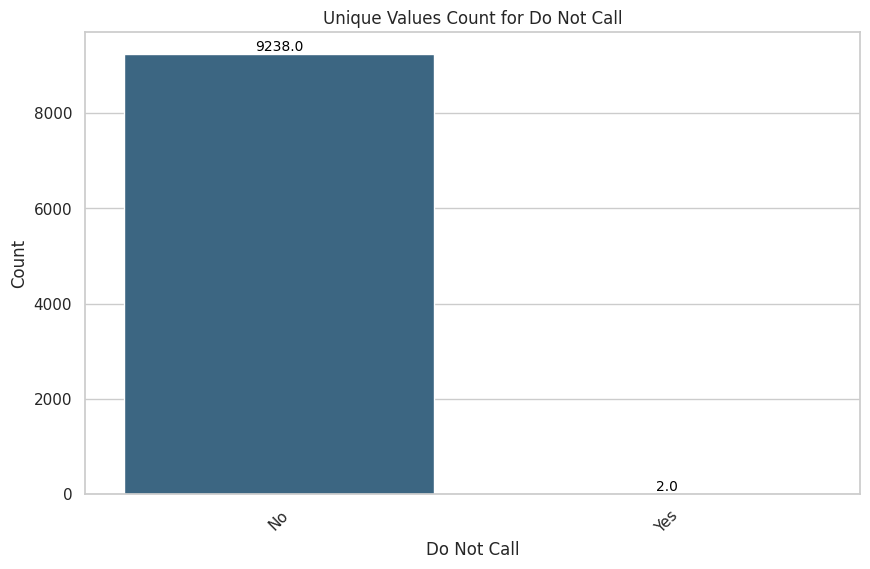

_________________________________________________________________________________________________________________





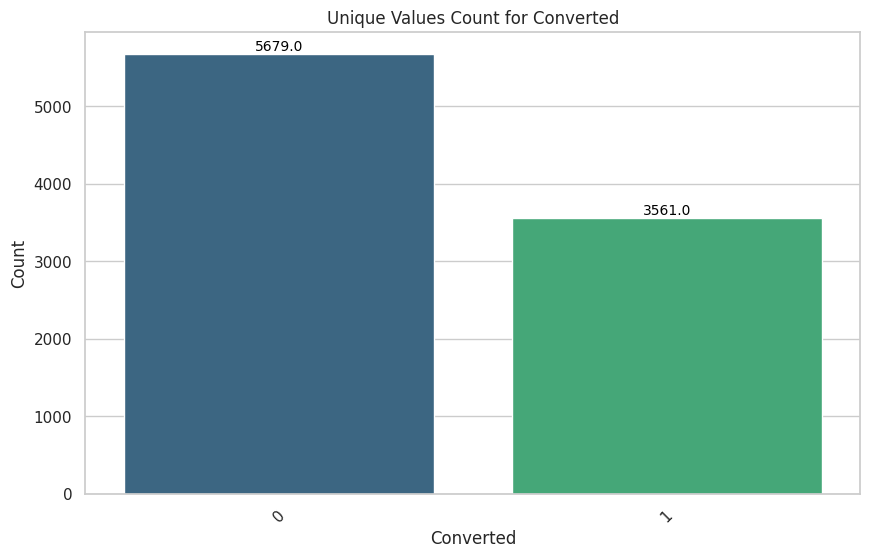

_________________________________________________________________________________________________________________





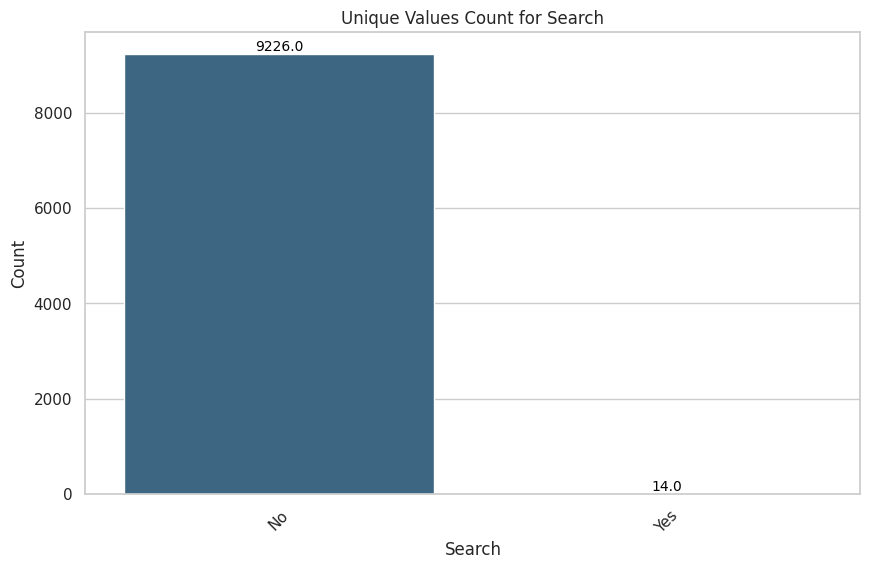

_________________________________________________________________________________________________________________





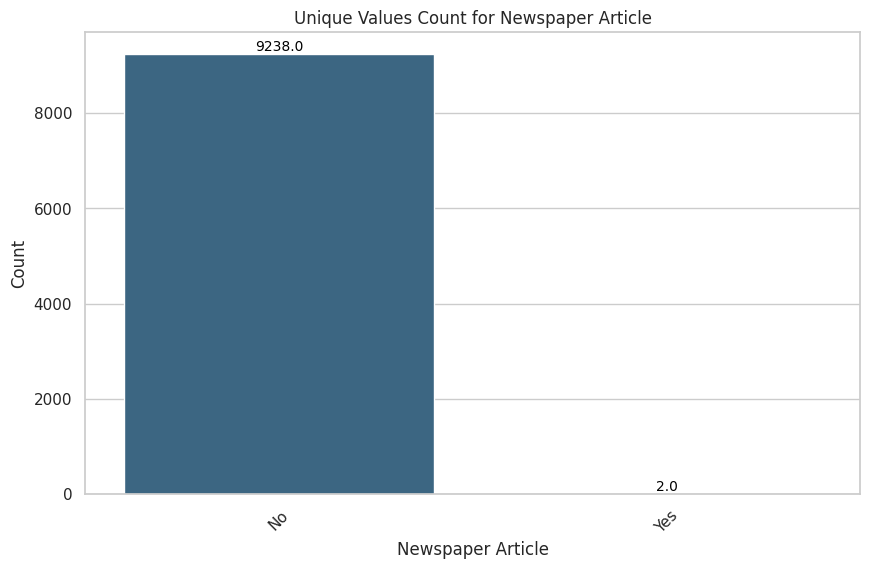

_________________________________________________________________________________________________________________





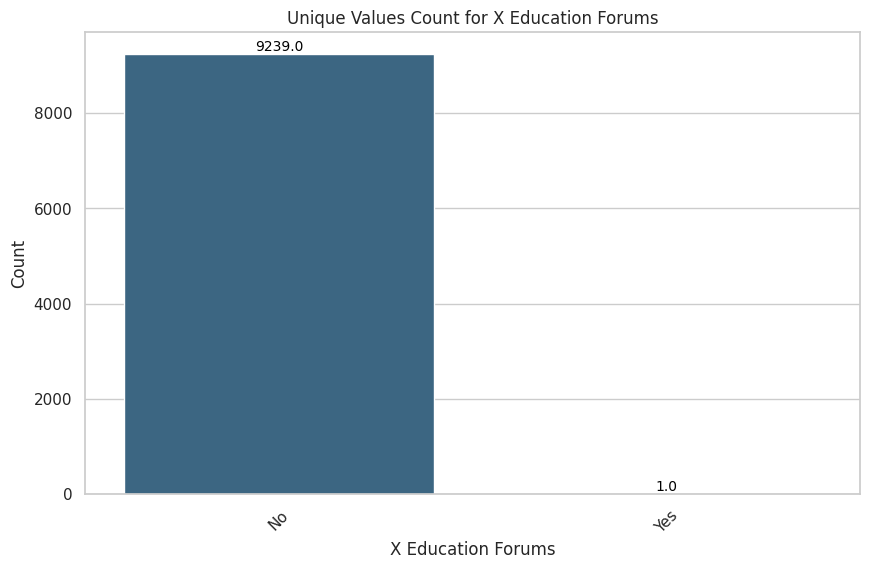

_________________________________________________________________________________________________________________





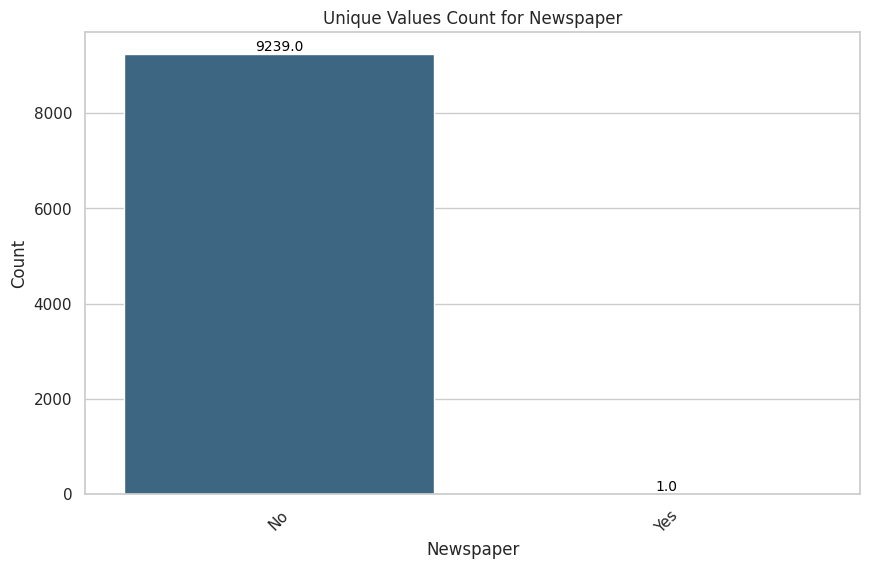

_________________________________________________________________________________________________________________





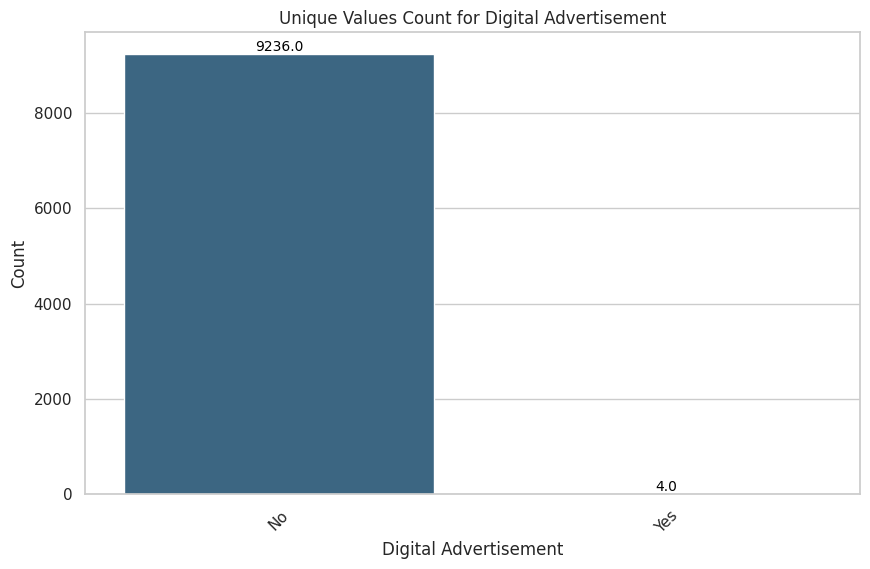

_________________________________________________________________________________________________________________





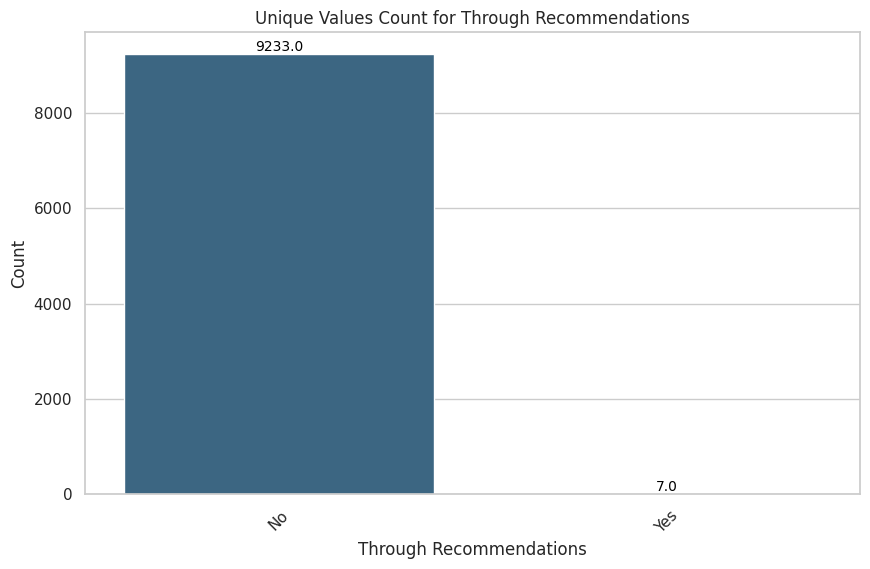

_________________________________________________________________________________________________________________





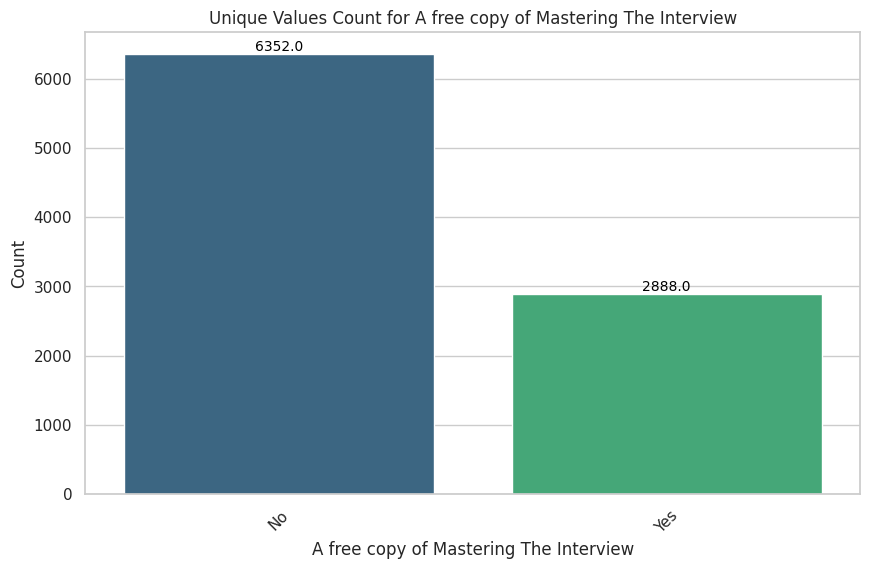

_________________________________________________________________________________________________________________





In [25]:
# Analyze unique values and its counts graphically for columns in 'columns_with_2_unique_values'
visualize_unique_values(df_dropped, columns_with_2_unique_values)

**Inferences:**
Columns 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations' are having highly skewed data and will not contribute significatly to analysis ,so better to drop these columns.

In [26]:
# Adding unwanted columns to list cols_to_drop
cols_to_drop += ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' ]

# Adding 'Last Notable Activity' from 'df_dropped' as its not relavant for the model
cols_to_drop += ['Last Notable Activity']

cols_to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Last Notable Activity']

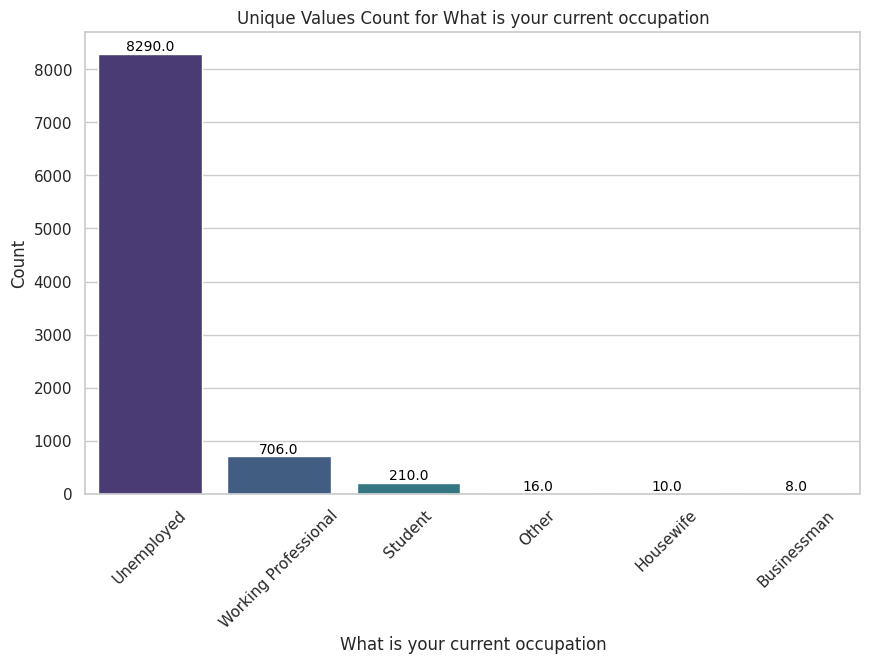

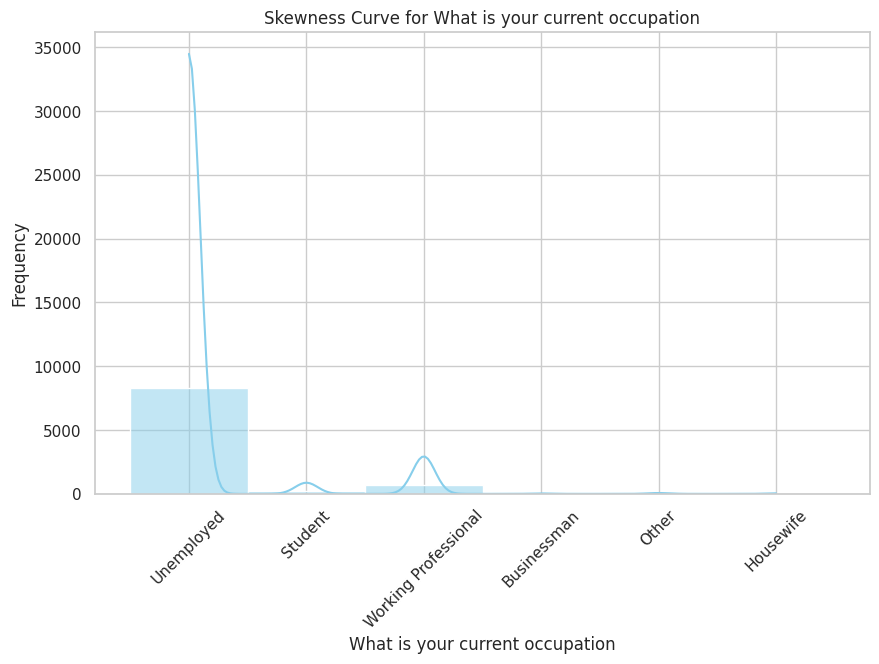

_________________________________________________________________________________________________________________





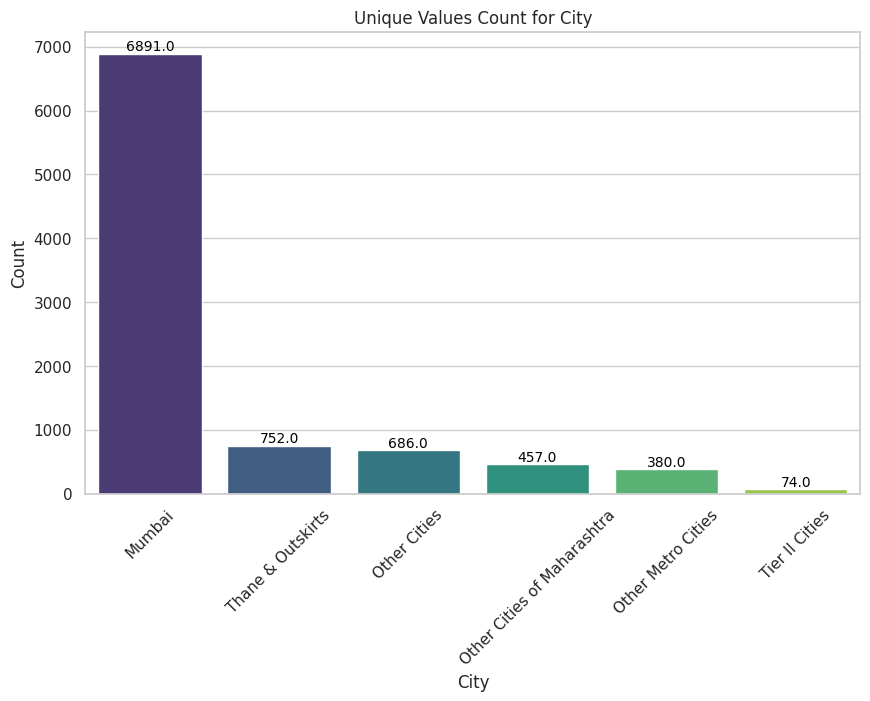

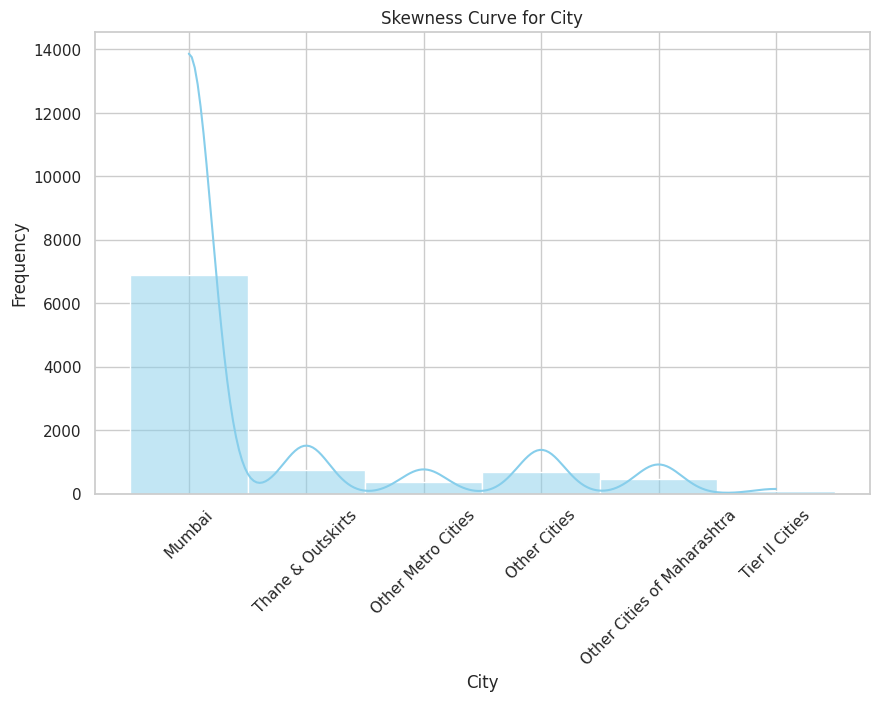

_________________________________________________________________________________________________________________





In [27]:
# Analyze unique values and its counts graphically for columns in 'columns_between_25_and_50_unique_values'
visualize_unique_values(df_dropped, columns_between_5_and_10_unique_values)

**Inferences:**
Column 'City'is having highly skewed data and will not contribute significatly to analysis ,so better to drop this column.

In [28]:
# Add 'City' to columns to be dropped
cols_to_drop += ['City']

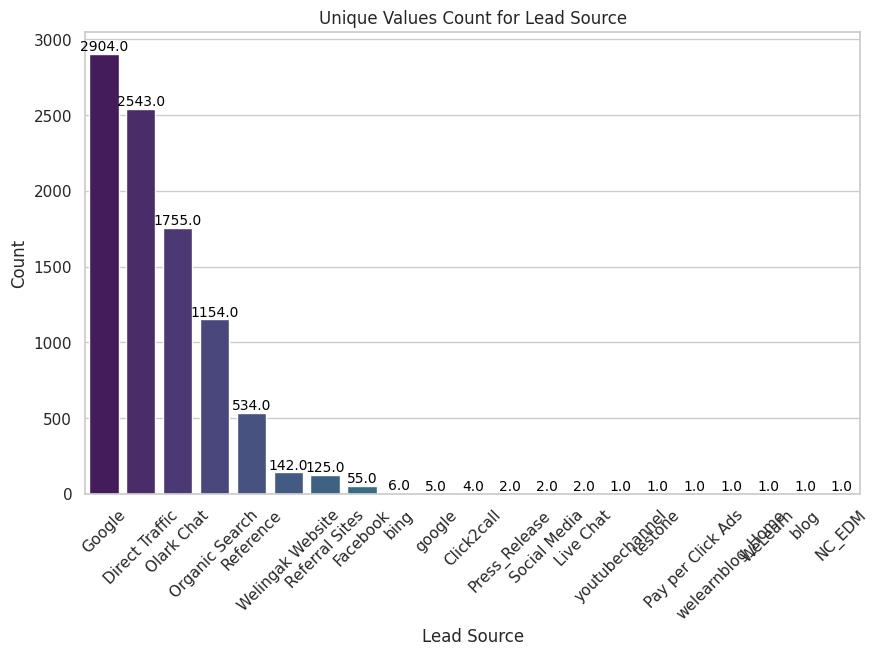

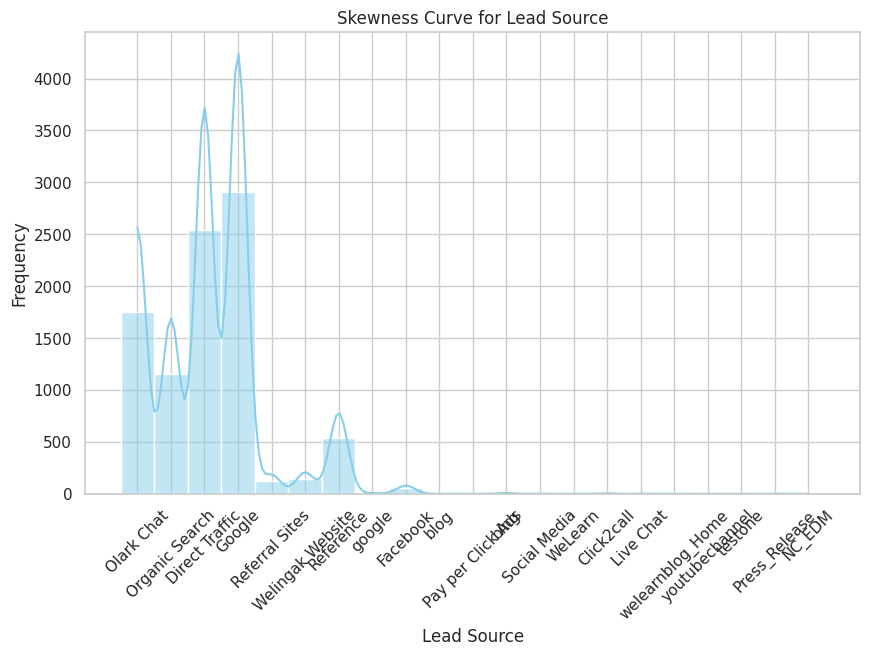

_________________________________________________________________________________________________________________





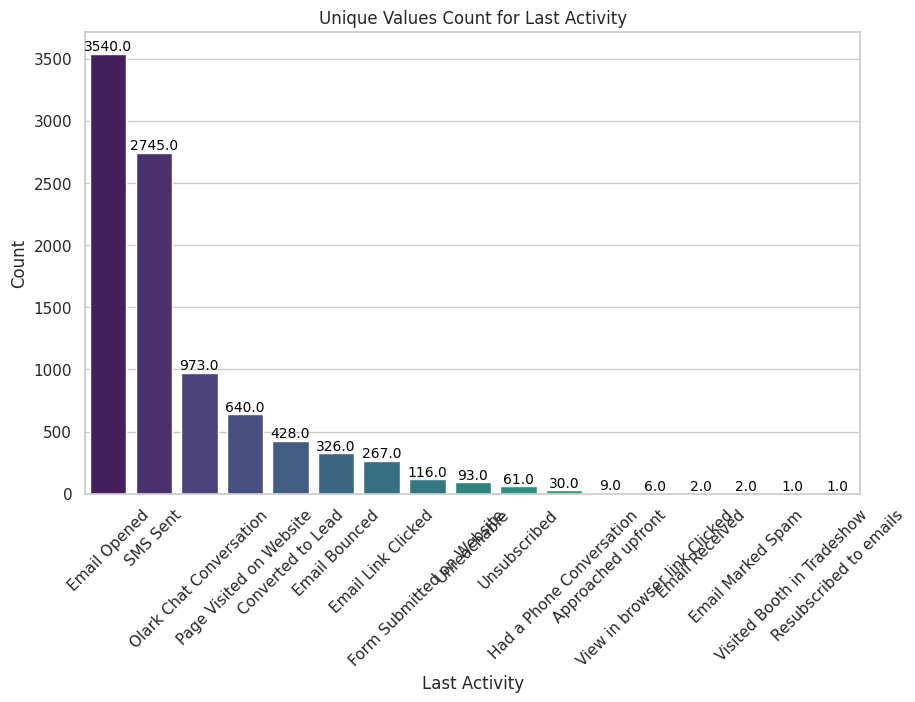

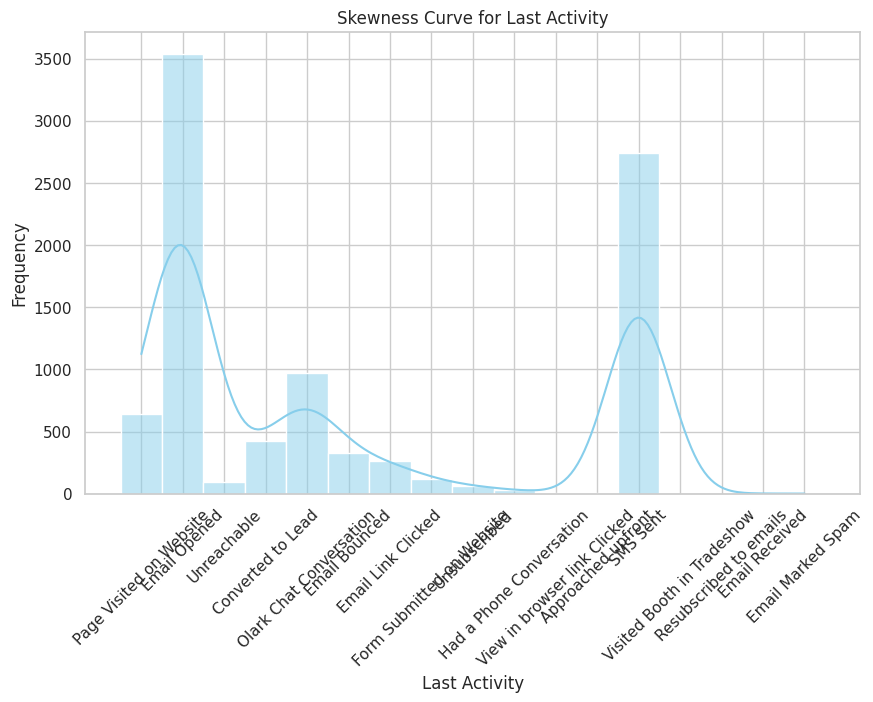

_________________________________________________________________________________________________________________





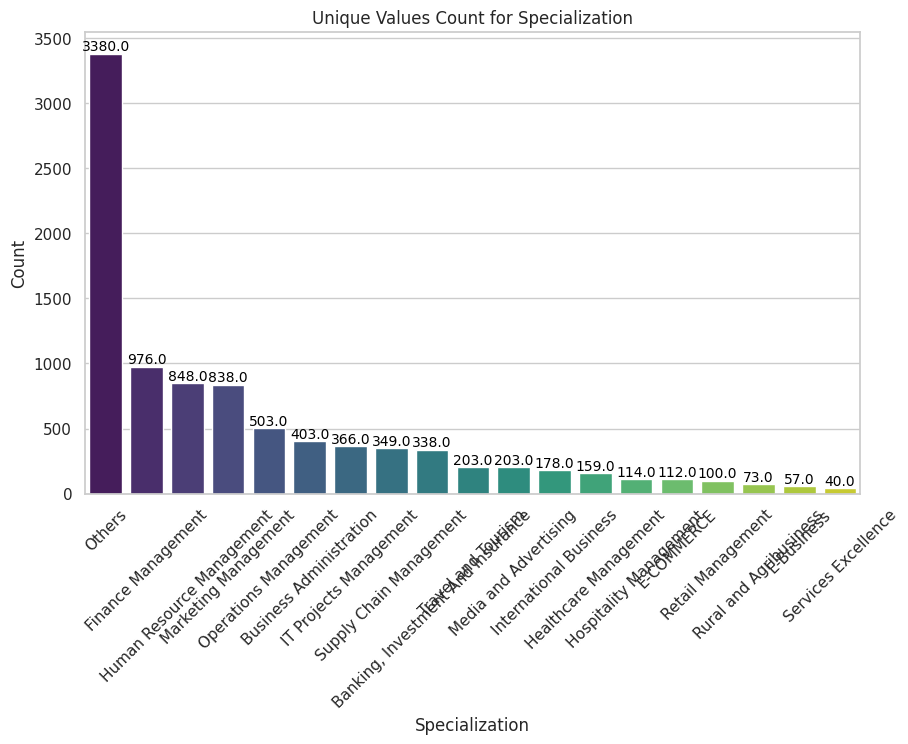

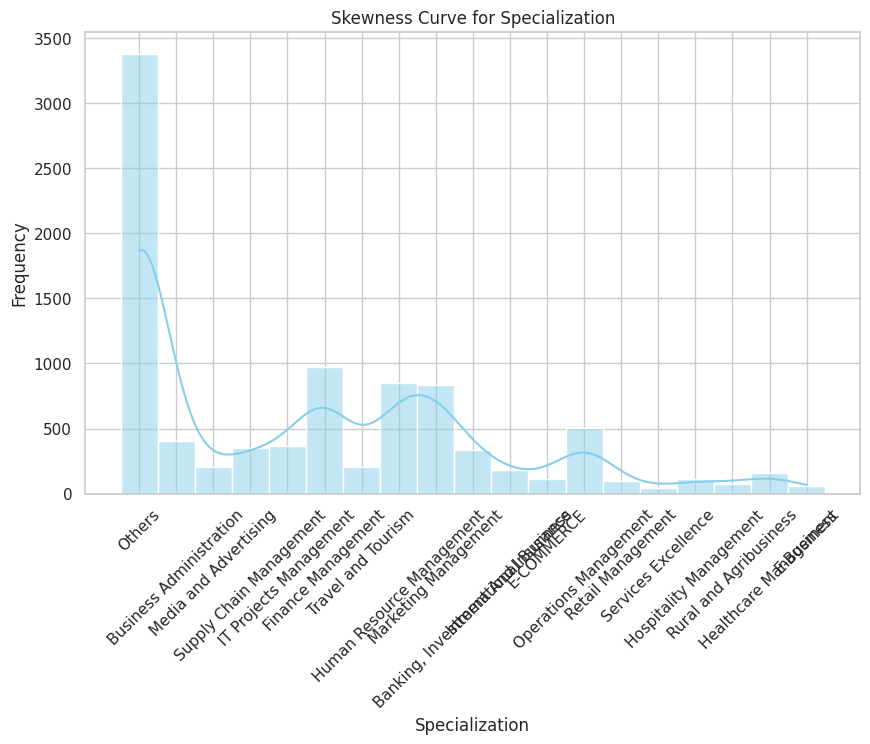

_________________________________________________________________________________________________________________





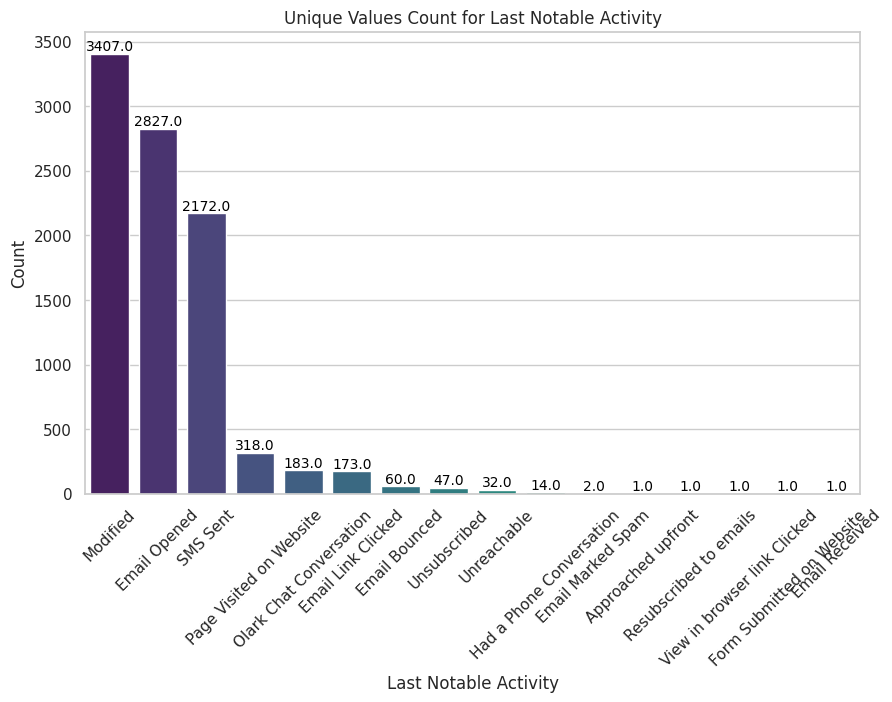

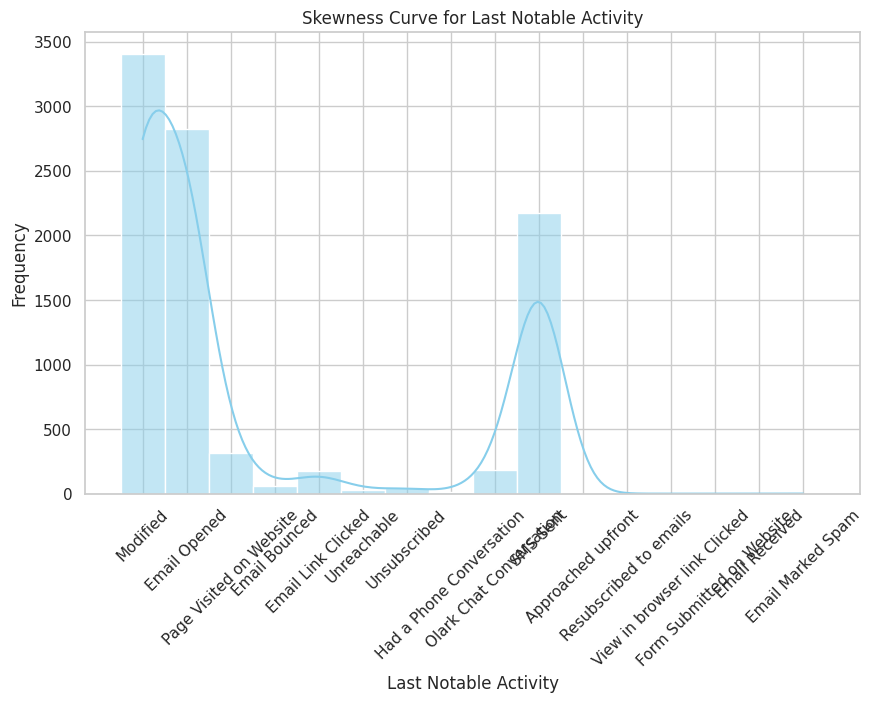

_________________________________________________________________________________________________________________





In [29]:
# Analyze unique values and its counts graphically for columns in 'columns_between_25_and_50_unique_values'
visualize_unique_values(df_dropped, columns_between_10_and_25_unique_values)

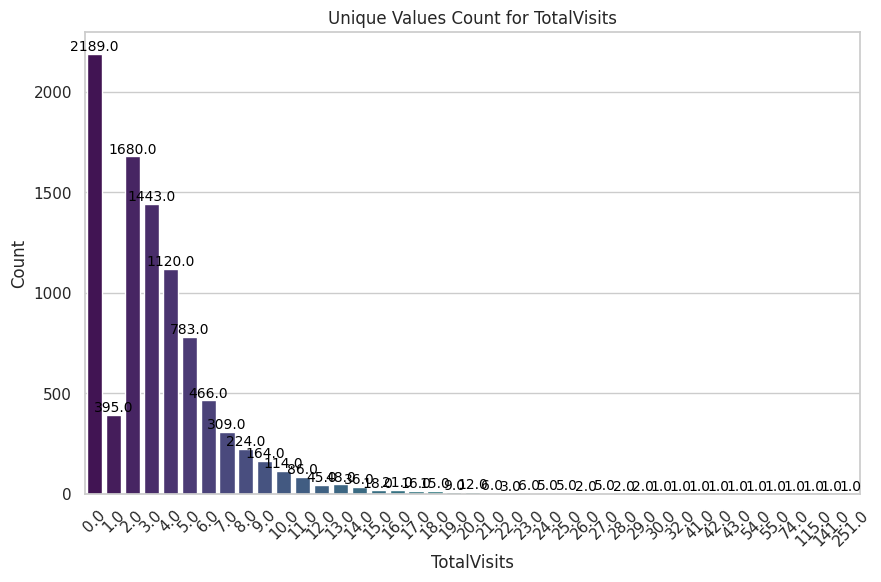

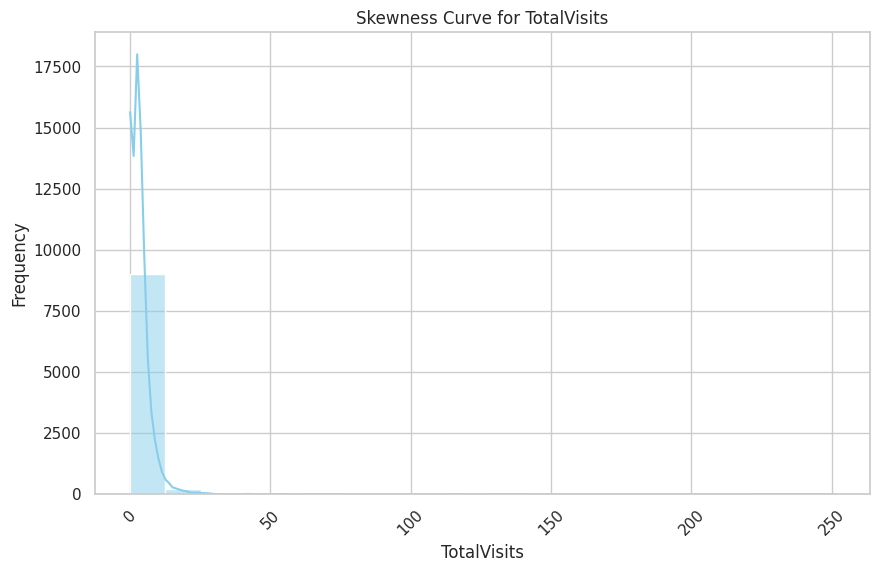

_________________________________________________________________________________________________________________





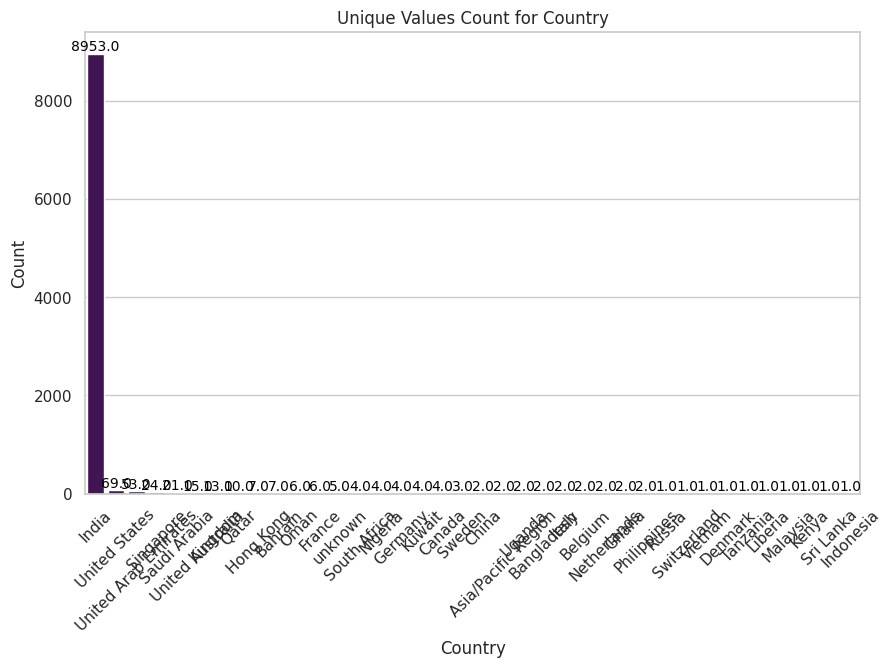

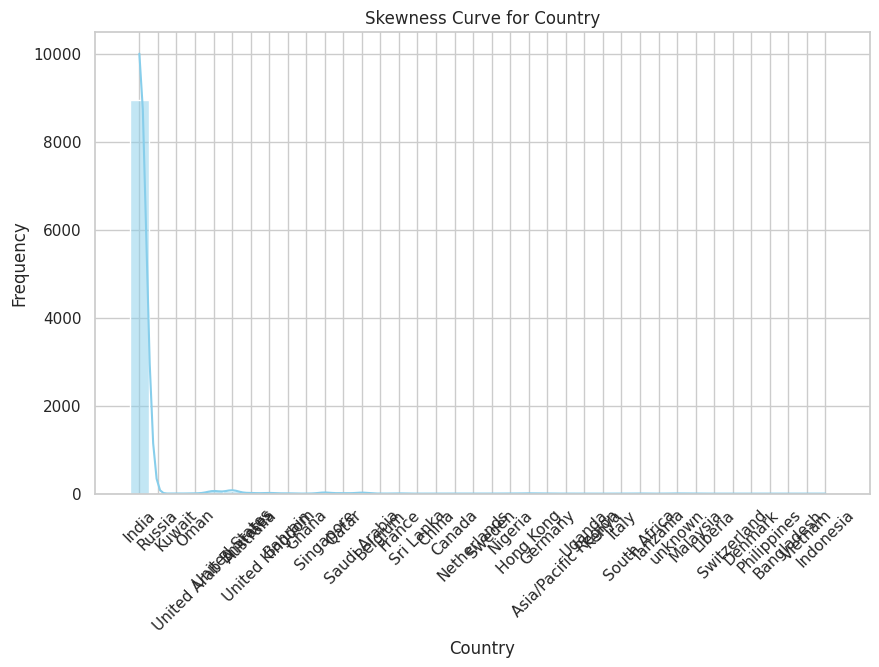

_________________________________________________________________________________________________________________





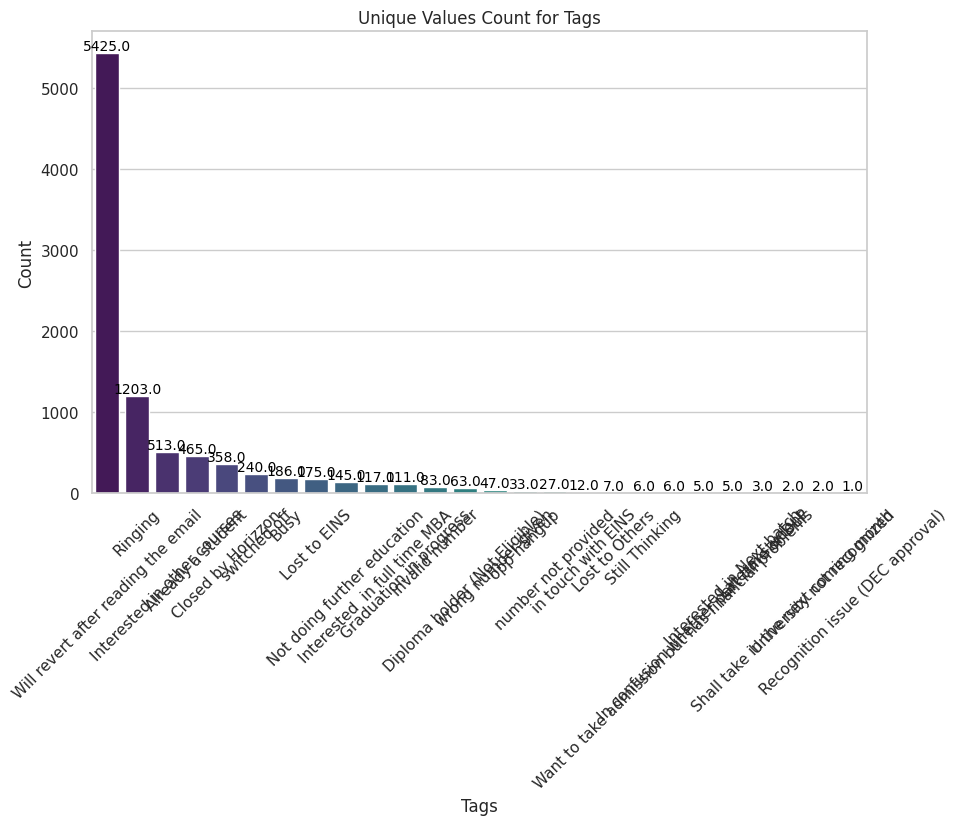

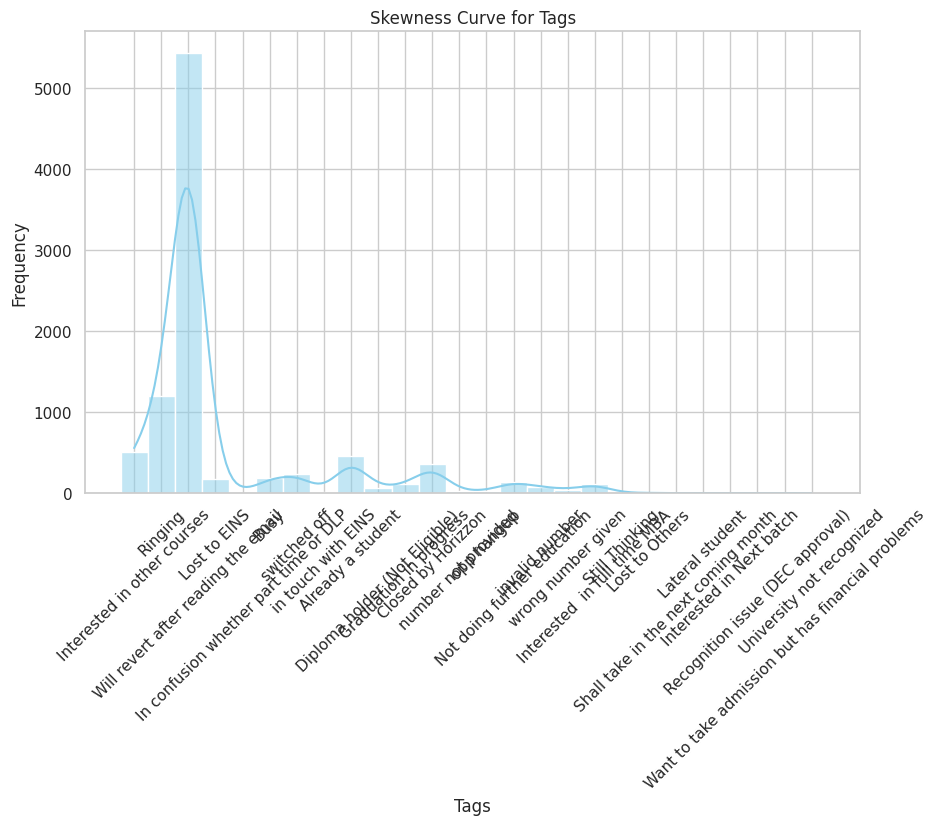

_________________________________________________________________________________________________________________





In [30]:
# Analyze unique values and its counts graphically for columns in 'columns_between_25_and_50_unique_values'
visualize_unique_values(df_dropped, columns_between_25_and_50_unique_values)

**Inferences:**
Column 'Tags' is created by the sales team after contacting the leads,so better to drop this column.

In [31]:
# Drop 'Tags' column
cols_to_drop += ['Tags']

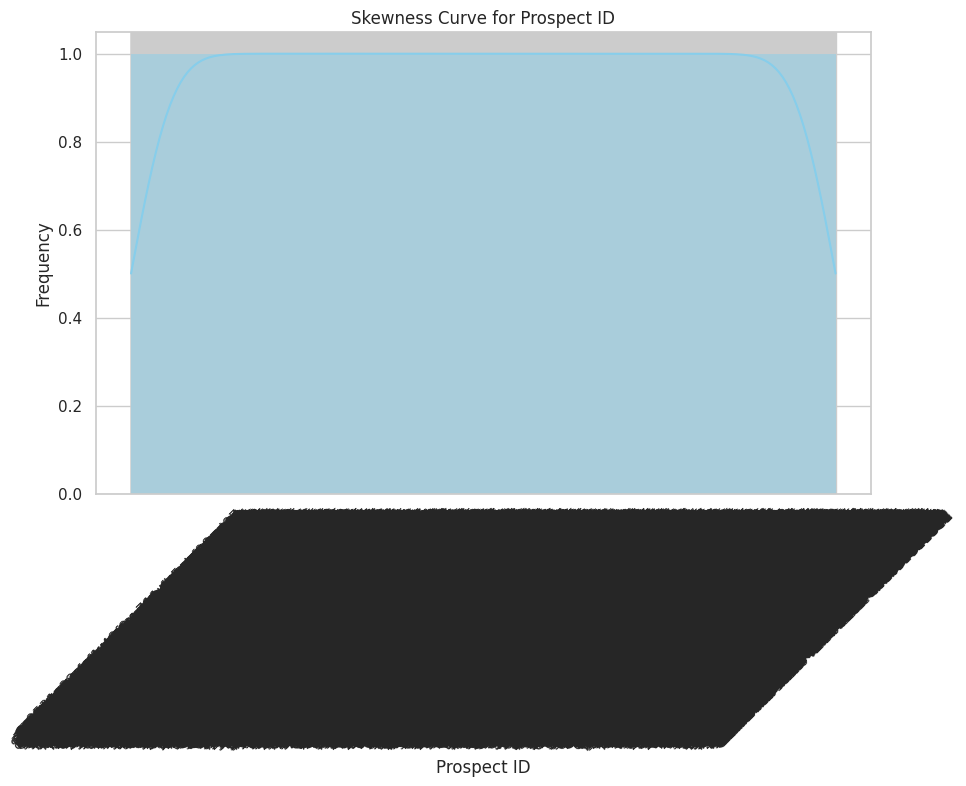

_________________________________________________________________________________________________________________





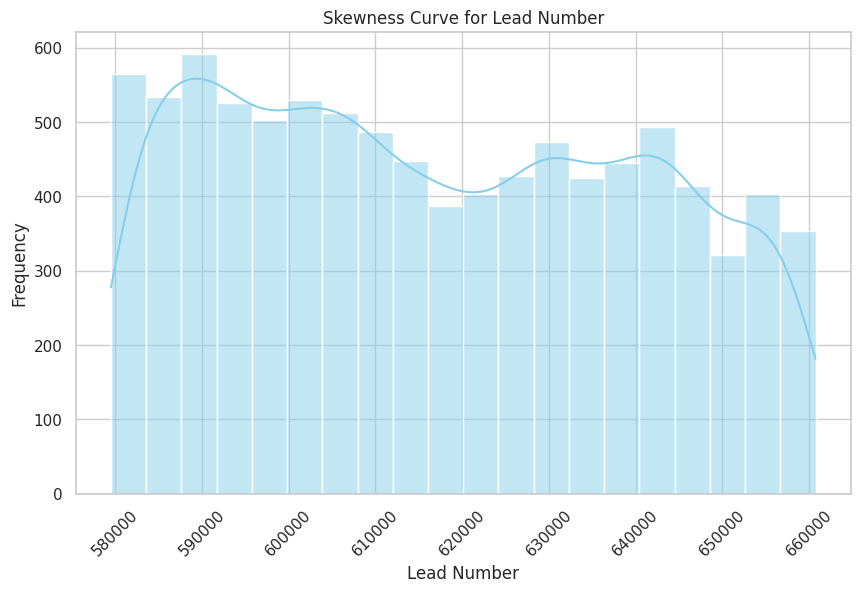

_________________________________________________________________________________________________________________





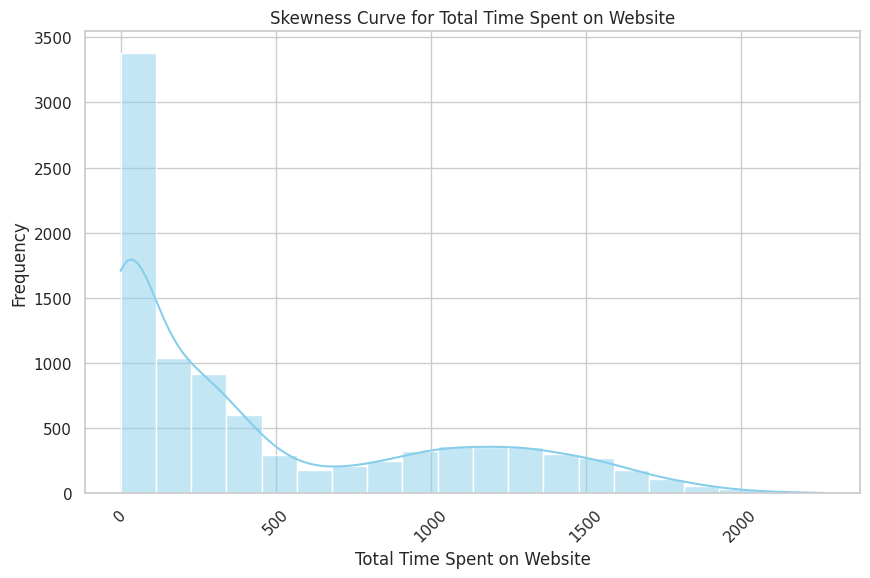

_________________________________________________________________________________________________________________





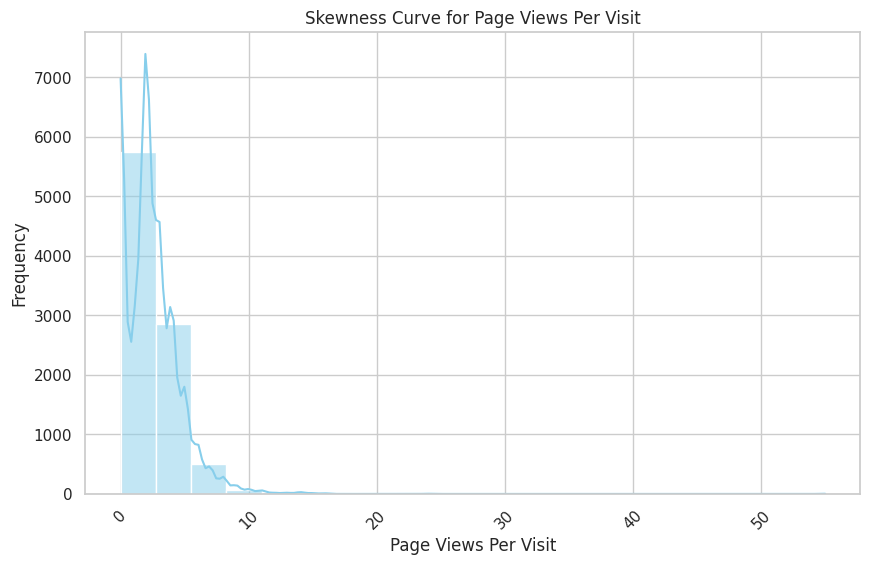

_________________________________________________________________________________________________________________





In [32]:
# Analyze unique values and its counts graphically for columns in 'columns_above_50_unique_values'
visualize_unique_values(df_dropped, columns_above_50_unique_values)

In [33]:
# Prospect ID is unique for entire data and can be removed
cols_to_drop += ['Prospect ID']
# 'Lead Number' is unique for entire data and can be removed
cols_to_drop += ['Lead Number']

In [34]:
# Drop columns stored in 'cols_to_drop' from data frame 'df_dropped'
df_dropped.drop(cols_to_drop, axis=1, inplace=True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [35]:
# Convert all 'object' type data type columns in 'df_dropped' data frame to 'categorical'
for column in df_dropped.select_dtypes(include=['object']).columns:
    df_dropped[column] = df_dropped[column].astype('category')

# Verify the changes
print(df_dropped.dtypes)

Lead Origin                               category
Lead Source                               category
Do Not Email                              category
Converted                                    int64
TotalVisits                                float64
Total Time Spent on Website                  int64
Page Views Per Visit                       float64
Last Activity                             category
Country                                   category
Specialization                            category
What is your current occupation           category
A free copy of Mastering The Interview    category
dtype: object


# **2. EDA**

**2.1 Univariate Analysis**

In [36]:
# Function to do univariate analysis
def univariate_analysis(column_name, df=df_dropped):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
        return

    # Determine the type of the column
    if df[column_name].dtype in ['object', 'category']:
        # Perform the analysis for categorical data
        data = df[column_name].value_counts()
        colors = sns.color_palette('pastel', len(data))  # Generate a color palette

        # Create the pie chart
        plt.figure(figsize=(8, 8))
        patches, texts = plt.pie(data, colors=colors, startangle=140, pctdistance=0.85)
        plt.title(f'Univariate Analysis of {column_name} (Categorical)')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # Create legend
        labels = [f'{data.index[i]}: {data[i]} ({data[i]/sum(data)*100:.2f}%)' for i in range(len(data))]
        plt.legend(patches, labels, loc="best", fontsize='small')

    elif df[column_name].dtype in ['int64', 'float64']:
        # Perform the analysis for numerical data
        plt.figure(figsize=(14, 6))

        # Subplot for KDE plot with additional information
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name], kde=True, color='skyblue')
        plt.title(f'Univariate Analysis of {column_name} (Numerical)')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

        # Additional information
        descriptives = df[column_name].describe()
        mini = descriptives['min']
        maxi = descriptives['max']
        ran = descriptives['max'] - descriptives['min']
        mean = descriptives['mean']
        median = descriptives['50%']
        st_dev = descriptives['std']
        skew = df[column_name].skew()
        kurt = df[column_name].kurtosis()
        textstr = f'Min: {mini:.2f}\nMax: {maxi:.2f}\nRange: {ran:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}\nStandard Deviation: {st_dev:.2f}\nSkewness: {skew:.2f}\nKurtosis: {kurt:.2f}'
        plt.text(0.5, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

        # Subplot for box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column_name], color='salmon')
        plt.title(f'Box Plot of {column_name}')
        plt.xlabel(column_name)

        # Annotate box plot with median, IQR, Q1, Q3 values
        median_value = df[column_name].median()
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        plt.text(0.7, 0.9, f'Median: {median_value:.2f}\nIQR: {iqr:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}',
                 transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

        # Check for upper outliers and remove 5% of them
        upper_outliers = df[df[column_name] > q3 + 1.5 * iqr]
        if not upper_outliers.empty:
            z = df_dropped[column_name].quantile(0.95)
            df_dropped[column_name][df_dropped[column_name] >= z] = z


    # Display the plot
    plt.tight_layout()
    plt.show()


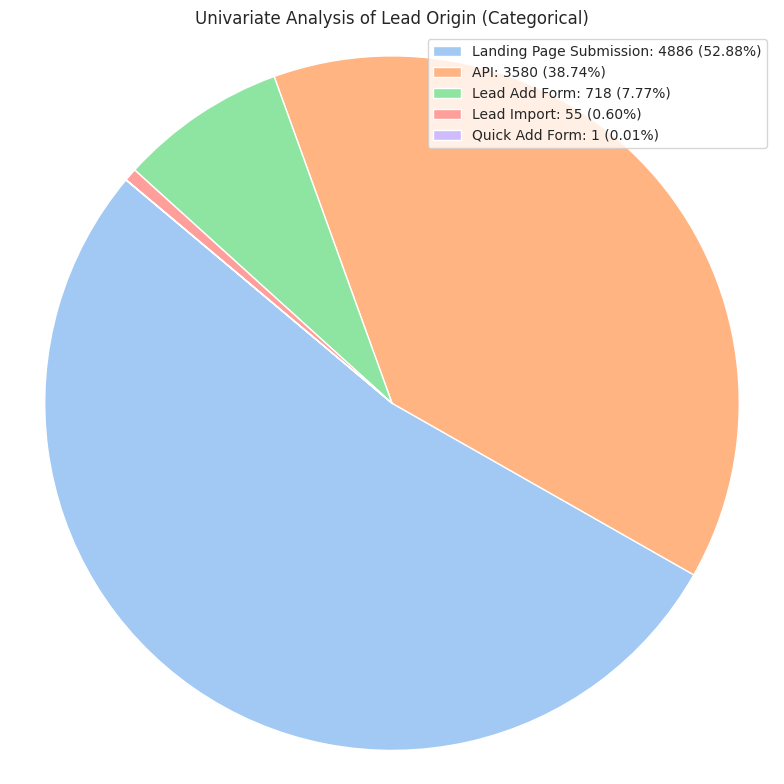

In [37]:
univariate_analysis('Lead Origin')

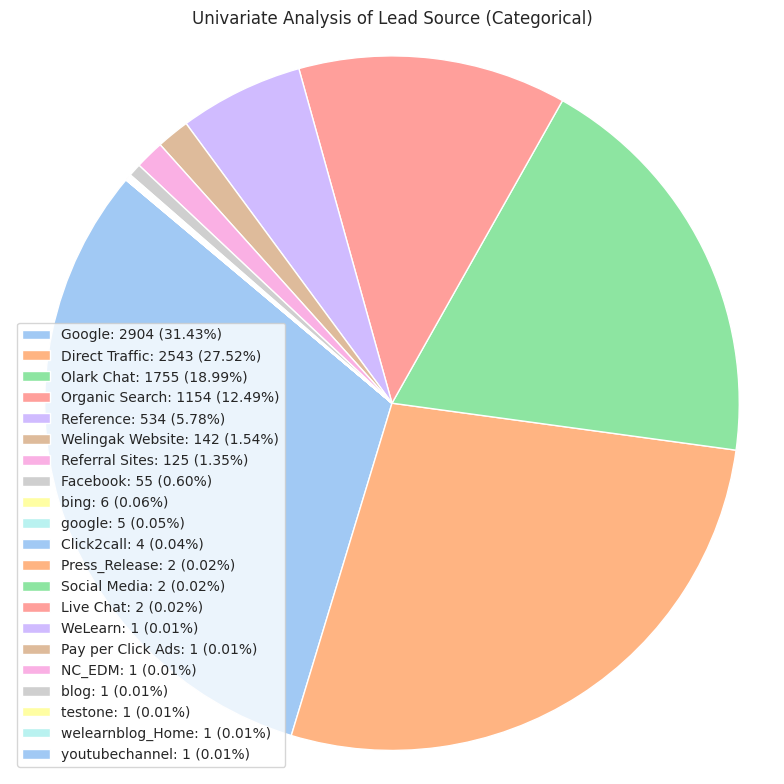

In [38]:
univariate_analysis( 'Lead Source')

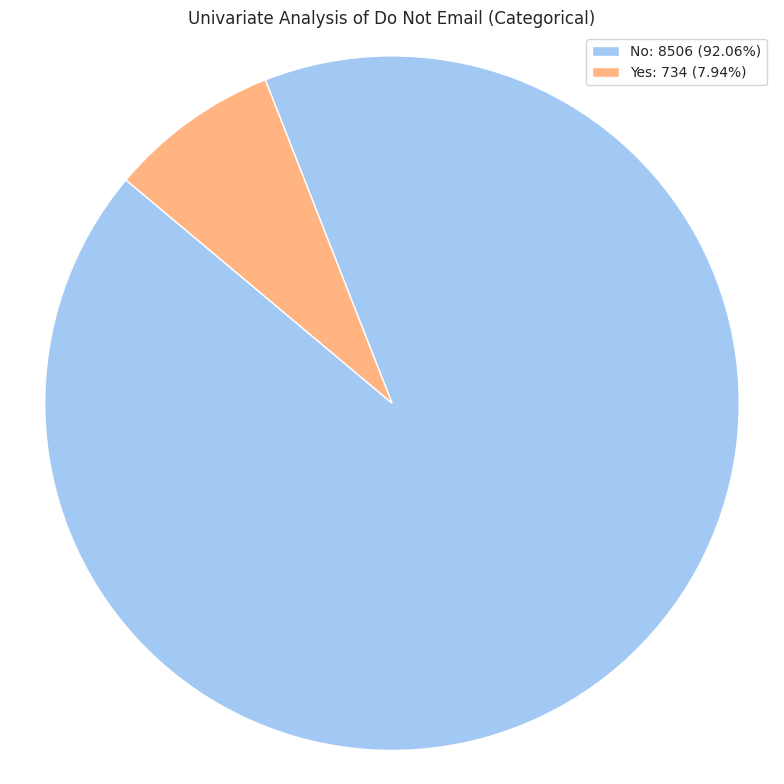

In [39]:
univariate_analysis('Do Not Email')

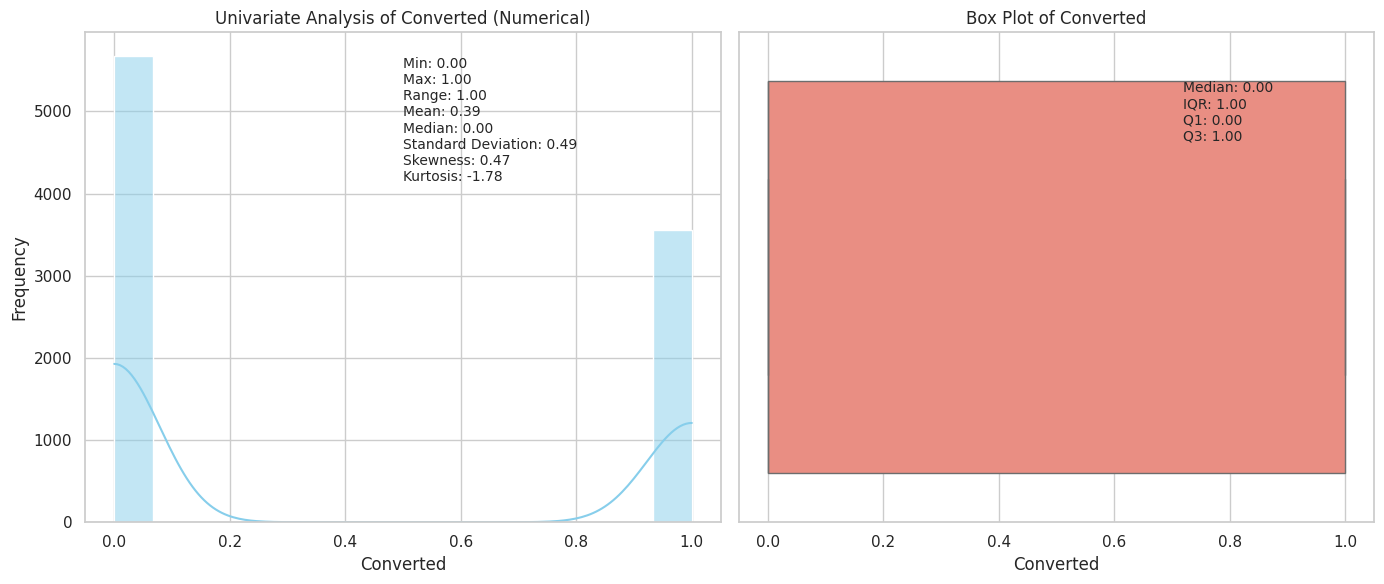

In [40]:
univariate_analysis( 'Converted')

In [41]:
# Calculating conversion rate
percentage_converted = (sum(df_dropped['Converted'])/len(df_dropped['Converted'].index))*100
percentage_converted

38.53896103896104

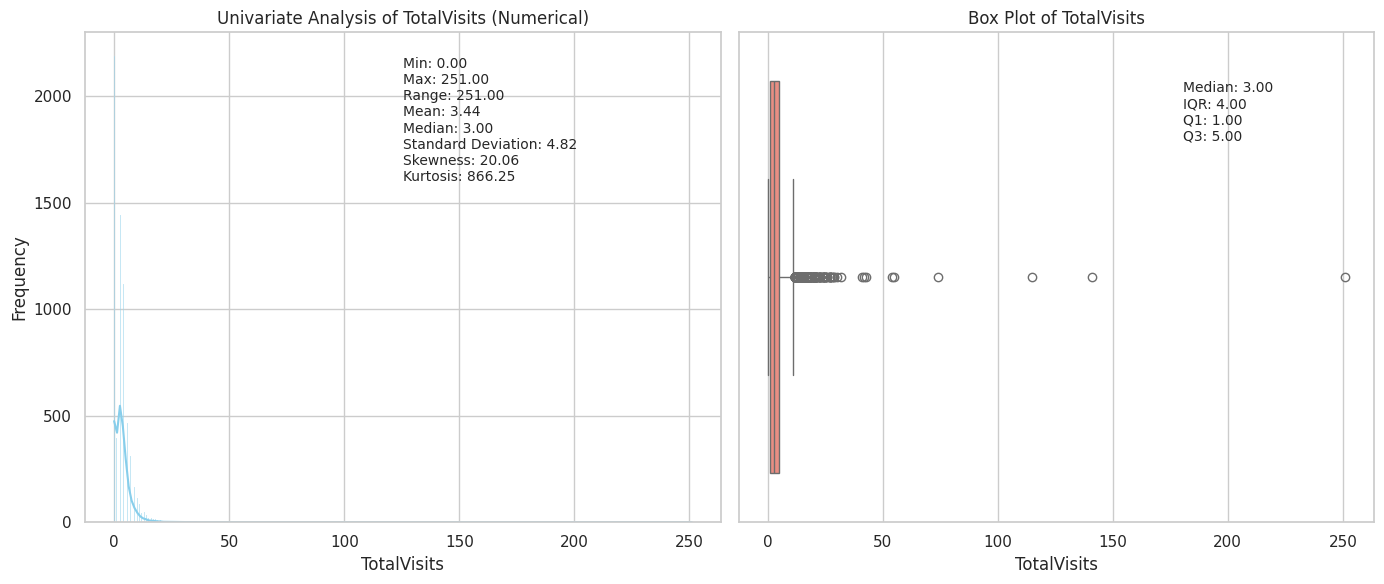

In [42]:
univariate_analysis('TotalVisits')

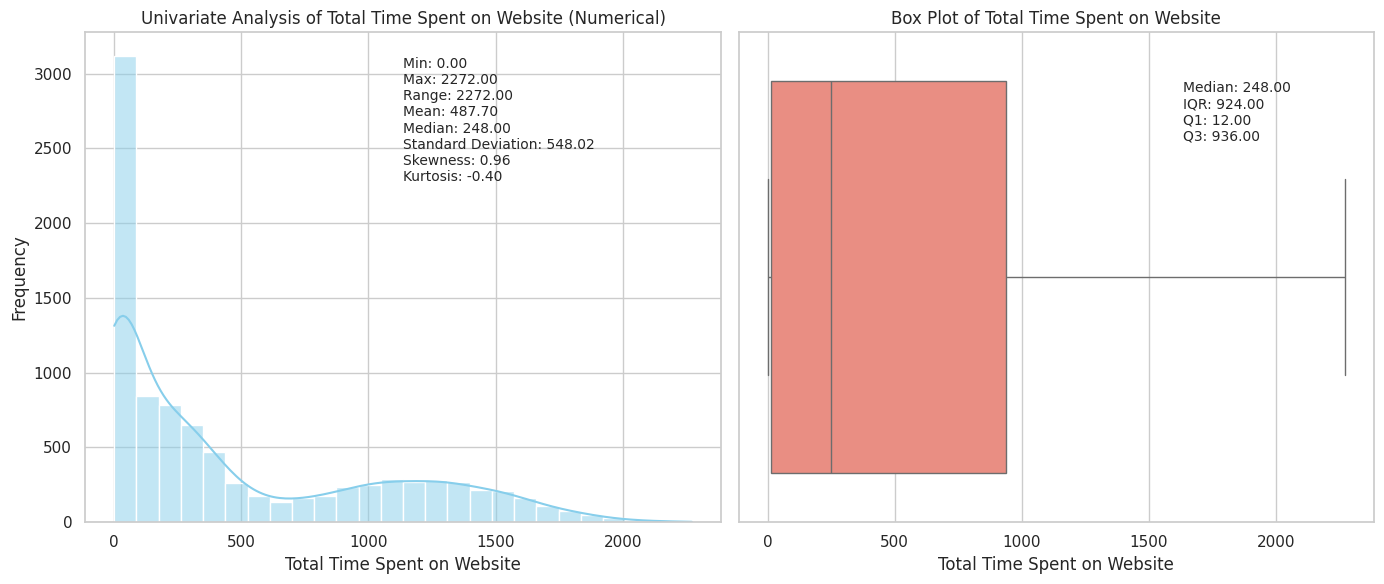

In [43]:
univariate_analysis('Total Time Spent on Website')

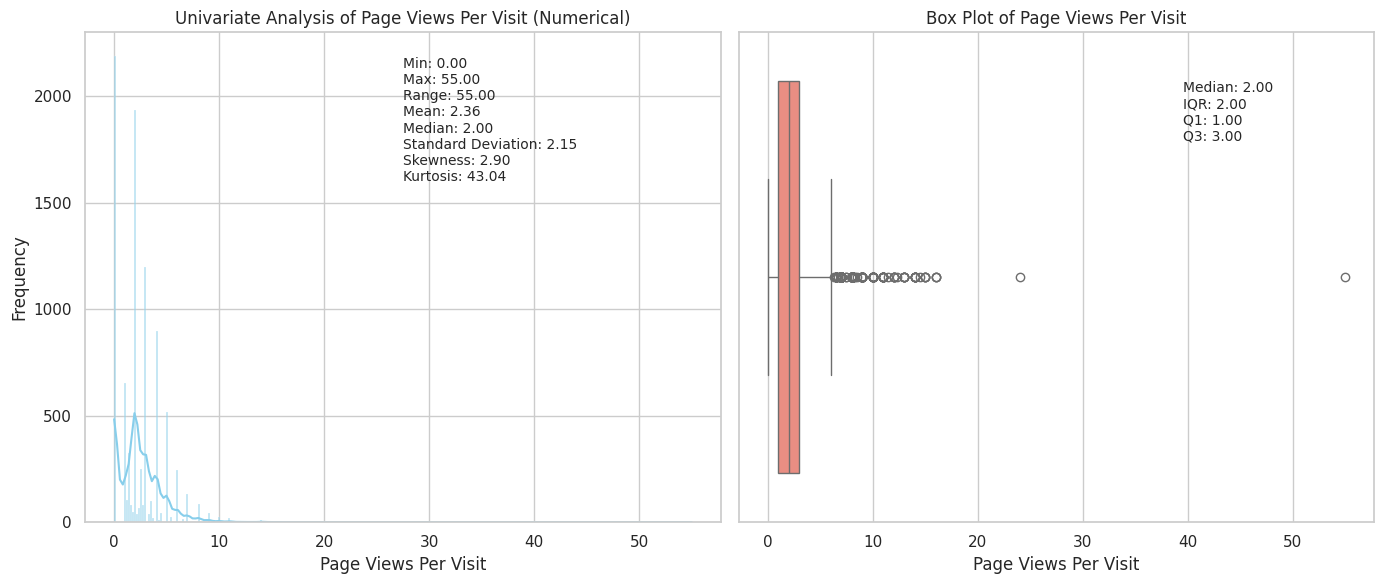

In [44]:
univariate_analysis( 'Page Views Per Visit')

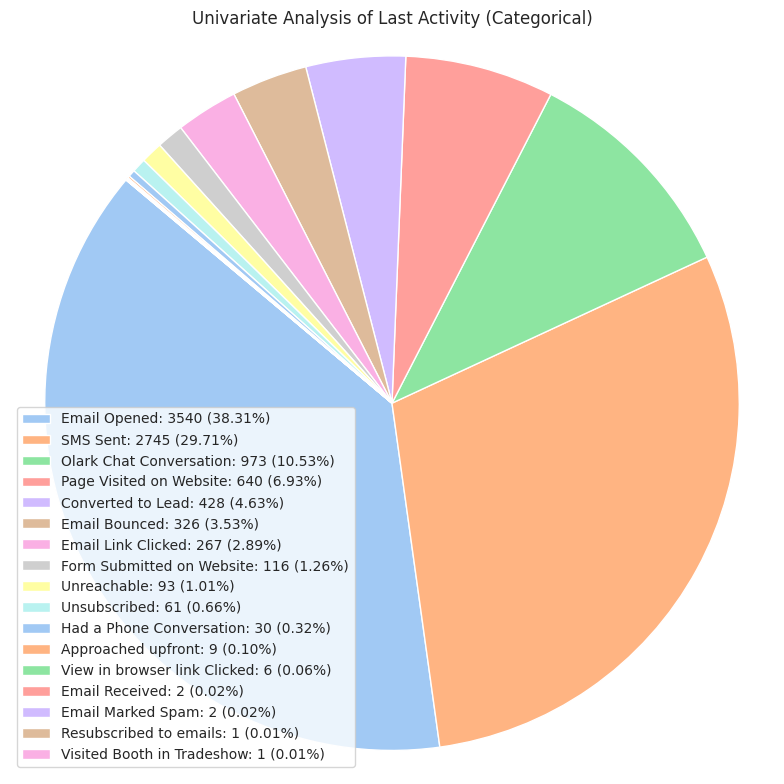

In [45]:
univariate_analysis('Last Activity')

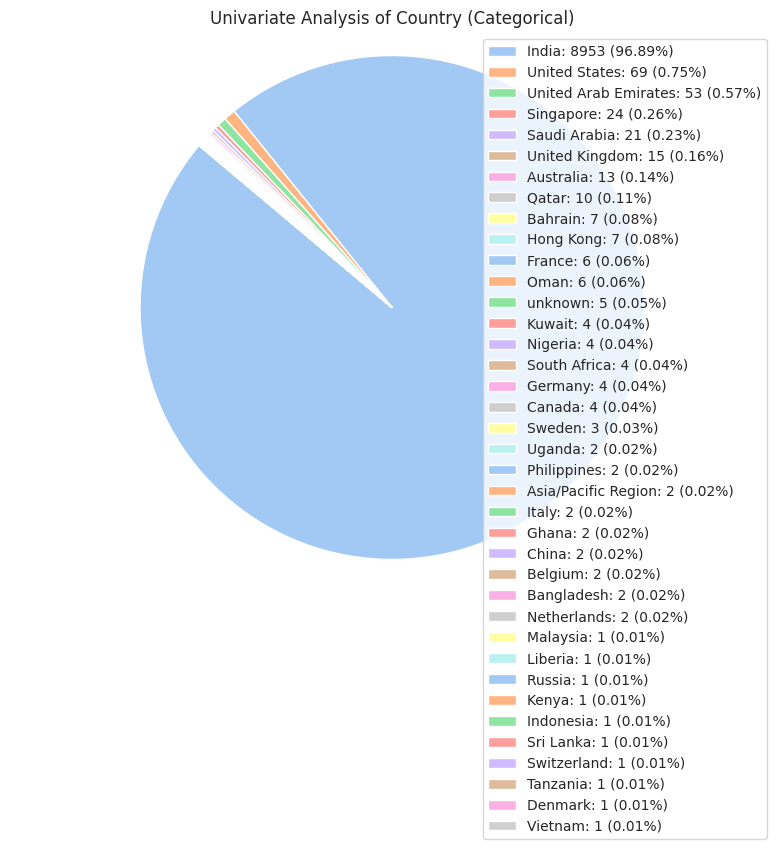

In [46]:
univariate_analysis('Country')

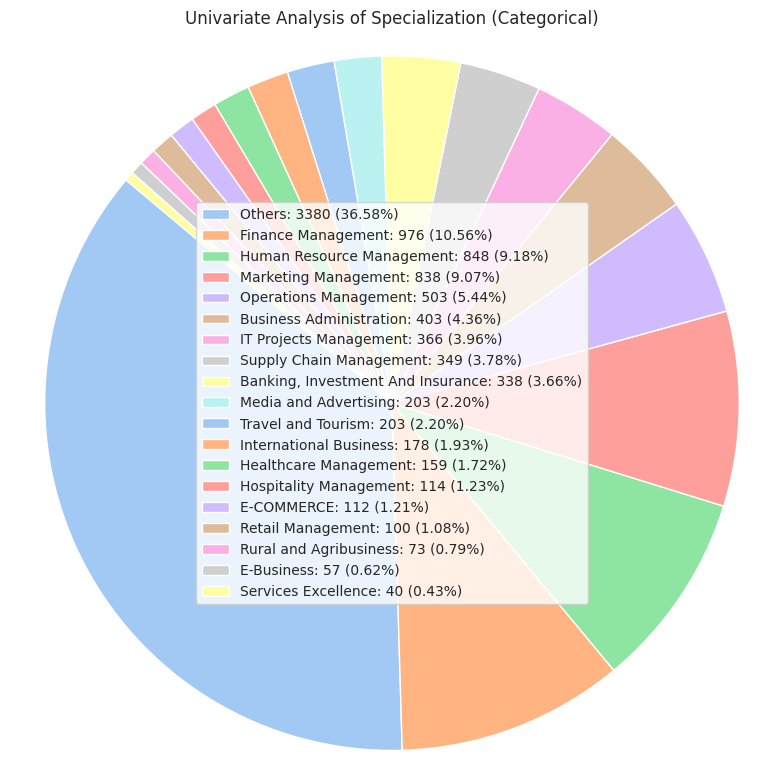

In [47]:
univariate_analysis( 'Specialization')

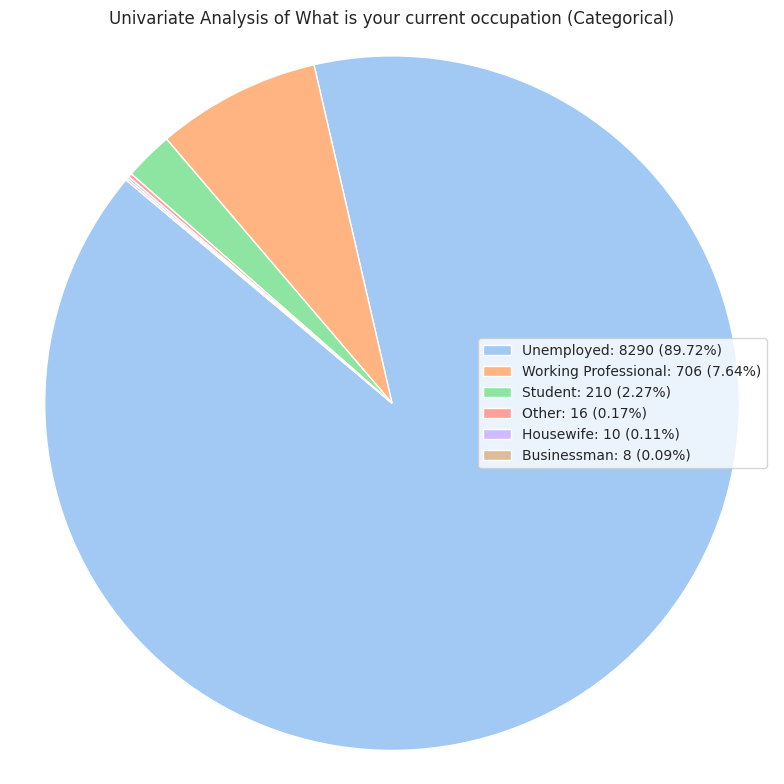

In [48]:
univariate_analysis( 'What is your current occupation')

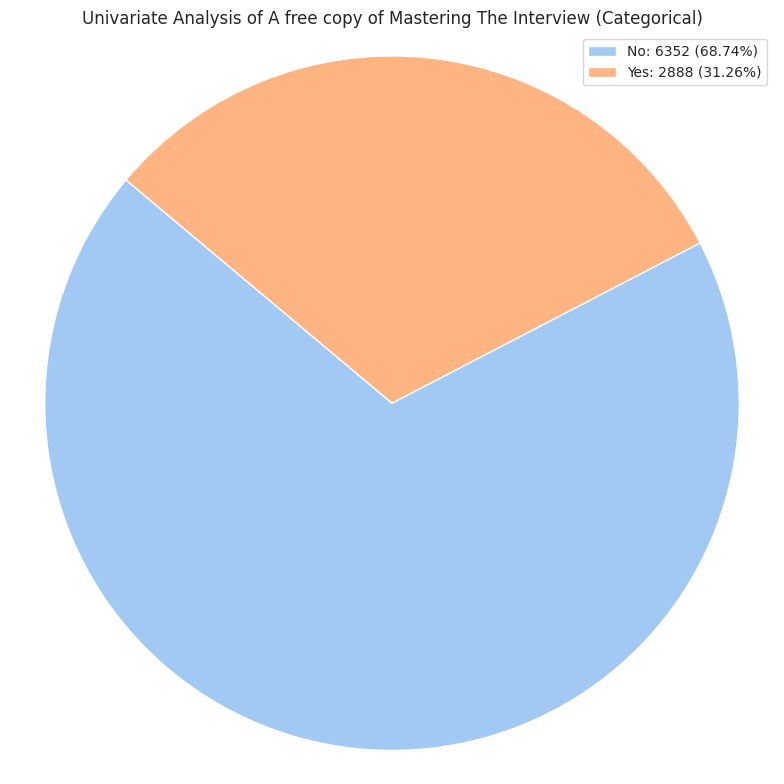

In [49]:
univariate_analysis( 'A free copy of Mastering The Interview')

In [50]:
univariate_analysis('Last Notable Activity')

The column 'Last Notable Activity' does not exist in the DataFrame.


In [51]:
# Highly skewed after imputation
df_dropped.drop('Country', axis=1, inplace=True)

**2.2 Bivariate Analysis**

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [52]:
# Function to do bivariate analysis
def bivariate_analysis(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
        return

    # Determine the type of the column
    if df[column_name].dtype in ['object', 'category']:
        # Perform the analysis for categorical data
        plt.figure(figsize=(12, 6))

        # Subplot for counts
        plt.subplot(1, 2, 1)
        sns.countplot(x=column_name, hue='Converted', data=df, palette='viridis')
        plt.title(f'Counts of {column_name} by Converted')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.legend(title='Converted')

        # Calculate counts of 'Converted' = 1 and 'Converted' = 0
        count_converted_1 = df[df['Converted'] == 1][column_name].value_counts()
        count_converted_0 = df[df['Converted'] == 0][column_name].value_counts()

        # Annotate bars with count values
        for i, val in enumerate(count_converted_1.index):
            plt.text(i, count_converted_1.values[i] + 1, f'{count_converted_1.values[i]}',
                     ha='center', va='bottom', fontsize=10, rotation=90)

        for i, val in enumerate(count_converted_0.index):
            plt.text(i, count_converted_0.values[i] + 1, f'{count_converted_0.values[i]}',
                     ha='right', va='bottom', fontsize=10, rotation=90)

        # Subplot for percentages
        plt.subplot(1, 2, 2)
        percentage_converted_1 = (count_converted_1 / (count_converted_1 + count_converted_0)) * 100
        sns.barplot(x=percentage_converted_1.index, y=percentage_converted_1.values, palette='viridis')
        plt.title(f'Percentage of Converted by {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Percentage Converted (%)')
        plt.xticks(rotation=90)

        # Annotate bars with percentage of Converted = 1
        for i, val in enumerate(percentage_converted_1.values):
            plt.text(i, val + 1, f'{val:.2f}%', horizontalalignment='center', verticalalignment='bottom',
                     fontdict={'fontweight': 'bold', 'size': 10}, rotation=90)

    elif df[column_name].dtype in ['int64', 'float64']:
        # Perform the analysis for numerical data
        plt.figure(figsize=(14, 6))

        # Subplot for box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Converted', y=column_name, data=df, palette='viridis')
        plt.title(f'Box Plot of {column_name} by Converted')
        plt.xlabel('Converted')
        plt.ylabel(column_name)

        # Subplot for KDE plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(data=df[df['Converted'] == 1][column_name], label='Converted = 1', shade=True)
        sns.kdeplot(data=df[df['Converted'] == 0][column_name], label='Converted = 0', shade=True)
        plt.title(f'KDE Plot of {column_name} by Converted')
        plt.xlabel(column_name)
        plt.ylabel('Density')

        # Display the plot
        plt.tight_layout()
        plt.show()

        # Additional information for box plot
        median_value_1 = df[df['Converted'] == 1][column_name].median()
        q1_1 = df[df['Converted'] == 1][column_name].quantile(0.25)
        q3_1 = df[df['Converted'] == 1][column_name].quantile(0.75)
        iqr_1 = q3_1 - q1_1

        median_value_0 = df[df['Converted'] == 0][column_name].median()
        q1_0 = df[df['Converted'] == 0][column_name].quantile(0.25)
        q3_0 = df[df['Converted'] == 0][column_name].quantile(0.75)
        iqr_0 = q3_0 - q1_0

        box_info = [
            ["Statistic", "Converted = 1", "Converted = 0"],
            ["Median", median_value_1, median_value_0],
            ["Q1", q1_1, q1_0],
            ["Q3", q3_1, q3_0],
            ["IQR", iqr_1, iqr_0]
        ]

        print("\nBox Plot Information:")
        print(tabulate(box_info, headers="firstrow", tablefmt="grid"))

        # Additional information for KDE plot
        descriptives_1 = df[df['Converted'] == 1][column_name].describe()
        mini_1 = descriptives_1['min']
        maxi_1 = descriptives_1['max']
        ran_1 = descriptives_1['max'] - descriptives_1['min']
        mean_1 = descriptives_1['mean']
        median_1 = descriptives_1['50%']
        st_dev_1 = descriptives_1['std']
        skew_1 = df[df['Converted'] == 1][column_name].skew()
        kurt_1 = df[df['Converted'] == 1][column_name].kurtosis()

        descriptives_0 = df[df['Converted'] == 0][column_name].describe()
        mini_0 = descriptives_0['min']
        maxi_0 = descriptives_0['max']
        ran_0 = descriptives_0['max'] - descriptives_0['min']
        mean_0 = descriptives_0['mean']
        median_0 = descriptives_0['50%']
        st_dev_0 = descriptives_0['std']
        skew_0 = df[df['Converted'] == 0][column_name].skew()
        kurt_0 = df[df['Converted'] == 0][column_name].kurtosis()

        kde_info = [
            ["Statistic", "Converted = 1", "Converted = 0"],
            ["Min", mini_1, mini_0],
            ["Max", maxi_1, maxi_0],
            ["Range", ran_1, ran_0],
            ["Mean", mean_1, mean_0],
            ["Median", median_1, median_0],
            ["Standard Deviation", st_dev_1, st_dev_0],
            ["Skewness", skew_1, skew_0],
            ["Kurtosis", kurt_1, kurt_0]
        ]

        print("\nKDE Plot Information:")
        print(tabulate(kde_info, headers="firstrow", tablefmt="grid"))


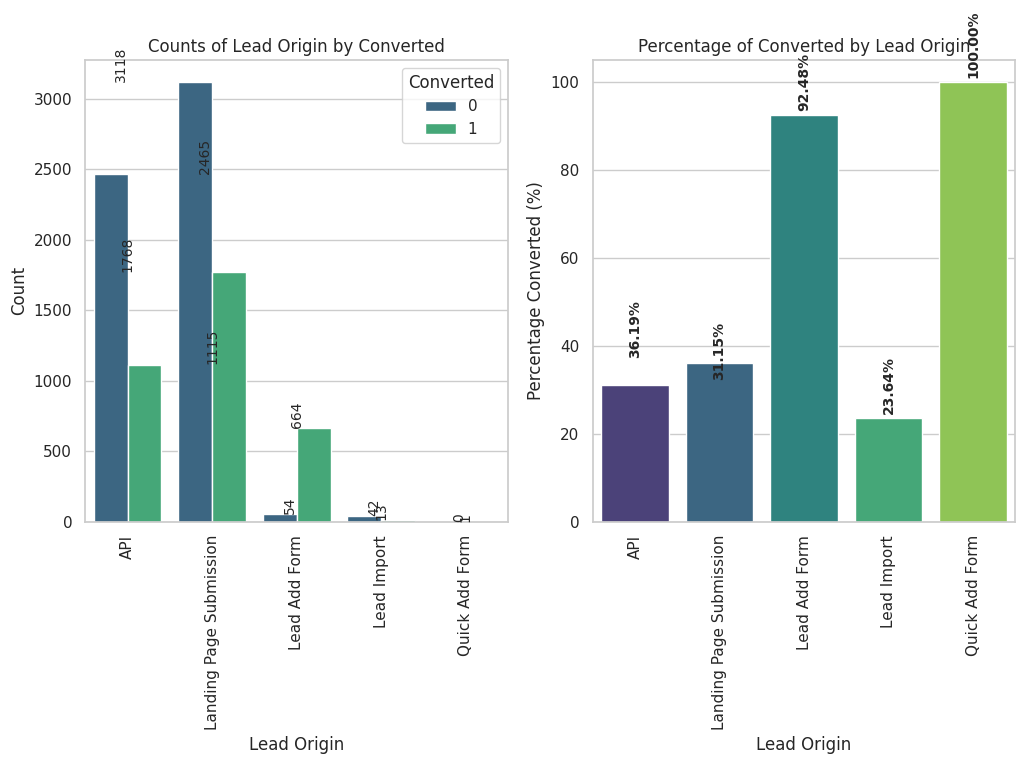

In [53]:
bivariate_analysis(df_dropped, 'Lead Origin')

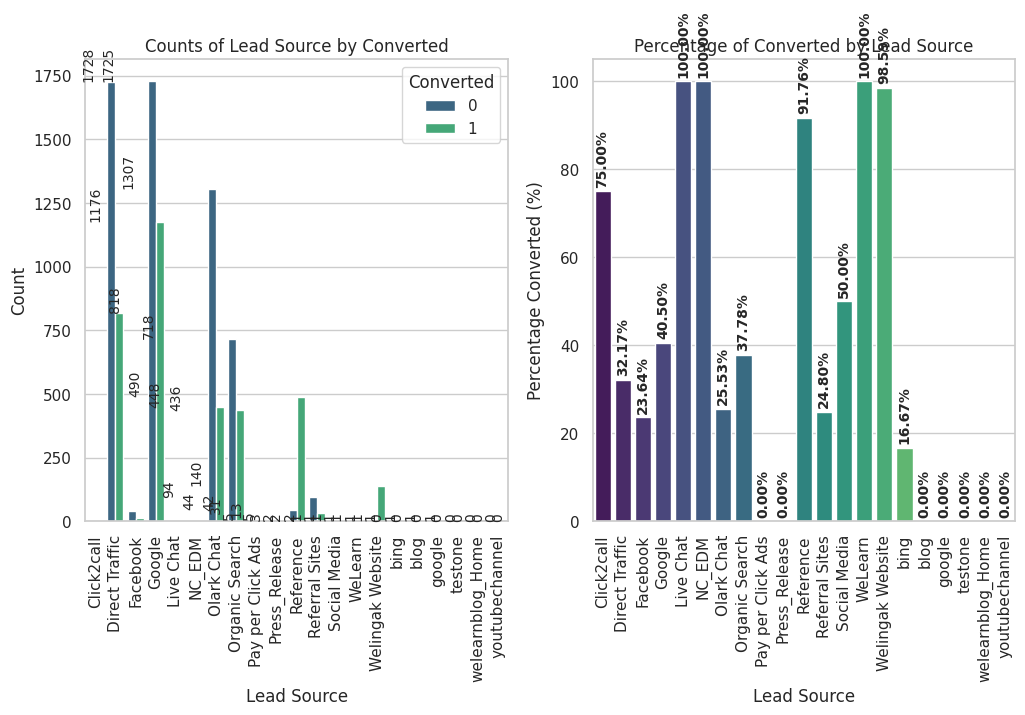

In [54]:
bivariate_analysis(df_dropped, 'Lead Source')

In [55]:
# Combining lower frequency values together
df_dropped['Lead Source'] = df_dropped['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

df_dropped['Lead Source'] = df_dropped['Lead Source'].replace("google", 'Google')

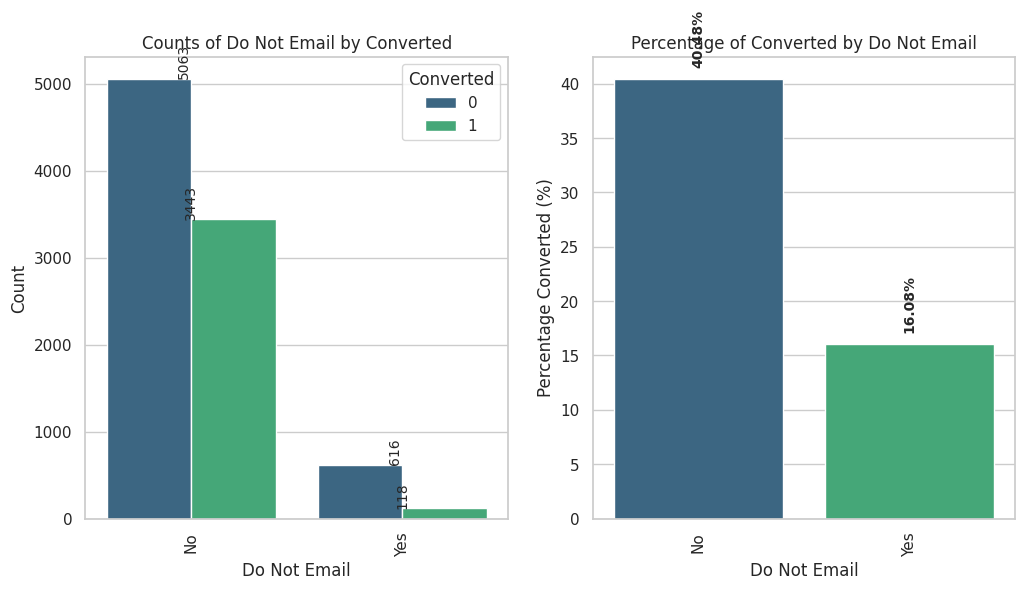

In [56]:
bivariate_analysis(df_dropped, 'Do Not Email')

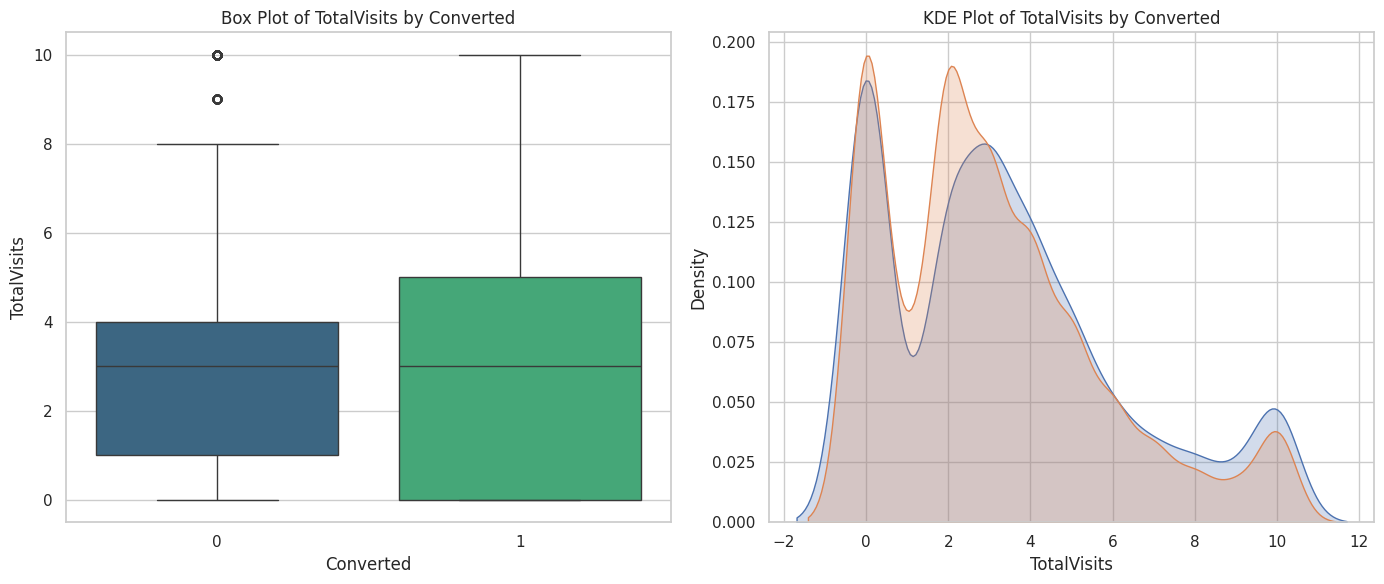


Box Plot Information:
+-------------+-----------------+-----------------+
| Statistic   |   Converted = 1 |   Converted = 0 |
+=============+=================+=================+
| Median      |               3 |               3 |
+-------------+-----------------+-----------------+
| Q1          |               0 |               1 |
+-------------+-----------------+-----------------+
| Q3          |               5 |               4 |
+-------------+-----------------+-----------------+
| IQR         |               5 |               3 |
+-------------+-----------------+-----------------+

KDE Plot Information:
+--------------------+-----------------+-----------------+
| Statistic          |   Converted = 1 |   Converted = 0 |
+====================+=================+=================+
| Min                |        0        |        0        |
+--------------------+-----------------+-----------------+
| Max                |       10        |       10        |
+--------------------+------

In [57]:
bivariate_analysis(df_dropped, 'TotalVisits')

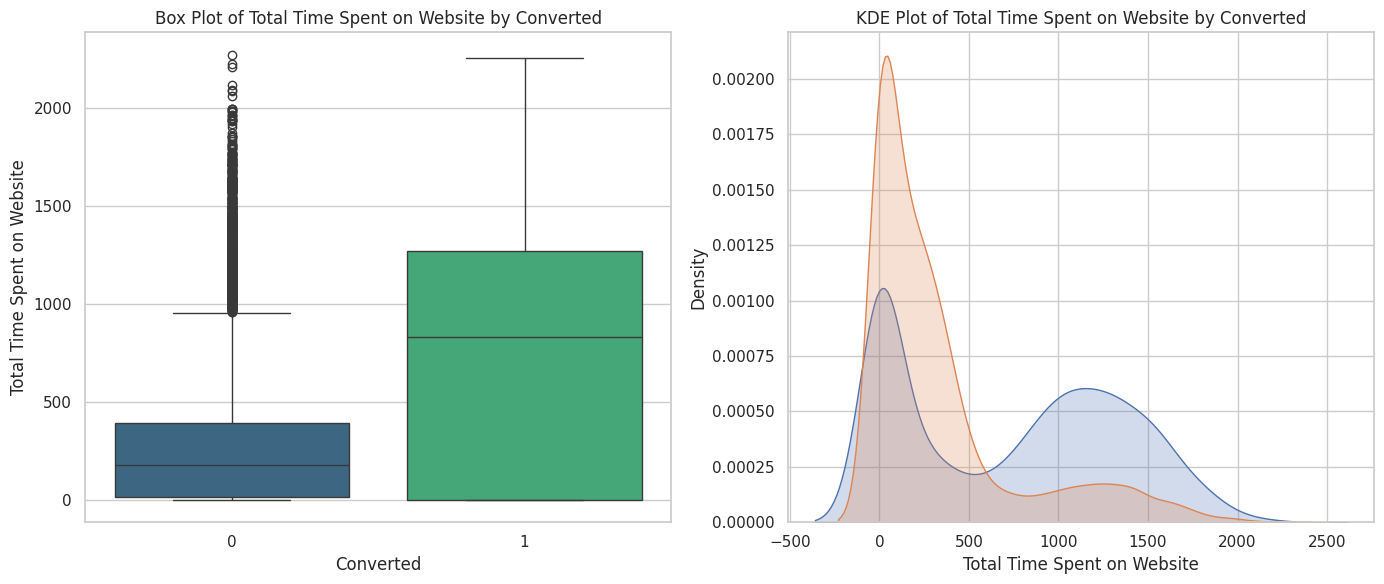


Box Plot Information:
+-------------+-----------------+-----------------+
| Statistic   |   Converted = 1 |   Converted = 0 |
+=============+=================+=================+
| Median      |             832 |             179 |
+-------------+-----------------+-----------------+
| Q1          |               0 |              16 |
+-------------+-----------------+-----------------+
| Q3          |            1268 |             393 |
+-------------+-----------------+-----------------+
| IQR         |            1268 |             377 |
+-------------+-----------------+-----------------+

KDE Plot Information:
+--------------------+-----------------+-----------------+
| Statistic          |   Converted = 1 |   Converted = 0 |
+====================+=================+=================+
| Min                |        0        |         0       |
+--------------------+-----------------+-----------------+
| Max                |     2253        |      2272       |
+--------------------+------

In [58]:
bivariate_analysis(df_dropped, 'Total Time Spent on Website')

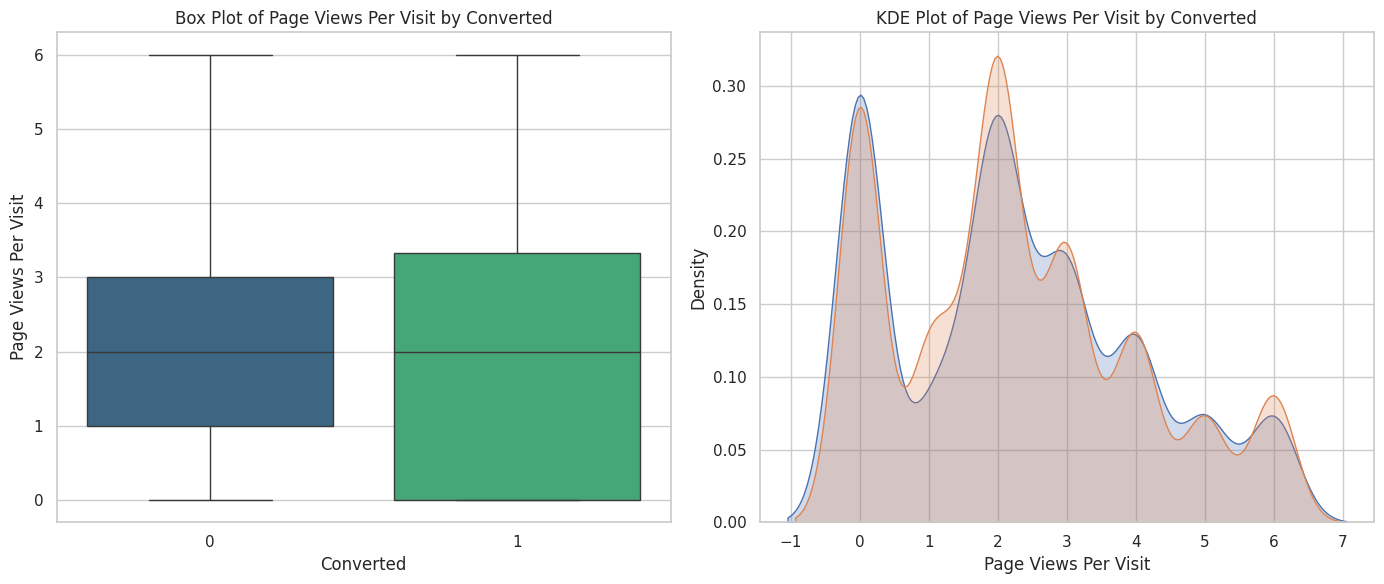


Box Plot Information:
+-------------+-----------------+-----------------+
| Statistic   |   Converted = 1 |   Converted = 0 |
+=============+=================+=================+
| Median      |            2    |               2 |
+-------------+-----------------+-----------------+
| Q1          |            0    |               1 |
+-------------+-----------------+-----------------+
| Q3          |            3.33 |               3 |
+-------------+-----------------+-----------------+
| IQR         |            3.33 |               2 |
+-------------+-----------------+-----------------+

KDE Plot Information:
+--------------------+-----------------+-----------------+
| Statistic          |   Converted = 1 |   Converted = 0 |
+====================+=================+=================+
| Min                |        0        |        0        |
+--------------------+-----------------+-----------------+
| Max                |        6        |        6        |
+--------------------+------

In [59]:
bivariate_analysis(df_dropped, 'Page Views Per Visit')

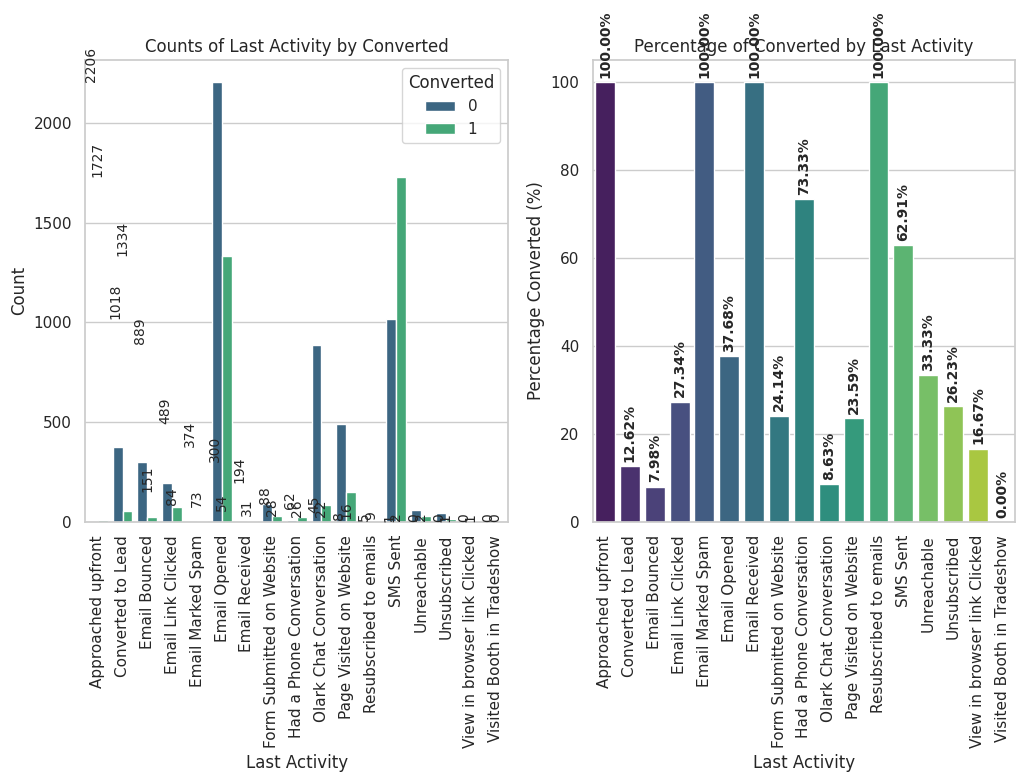

In [60]:
bivariate_analysis(df_dropped, 'Last Activity')

In [61]:
# Combining lower frequency values together under label 'Misc'
df_dropped['Last Activity'] =df_dropped['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

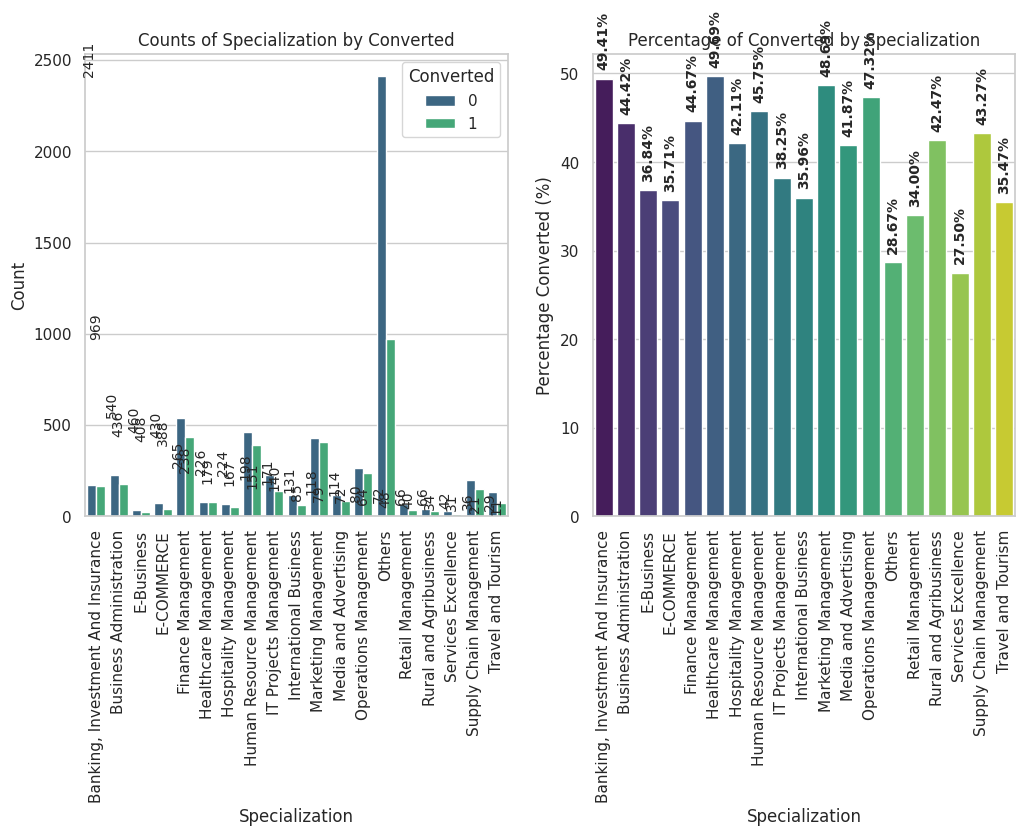

In [62]:
bivariate_analysis(df_dropped, 'Specialization')

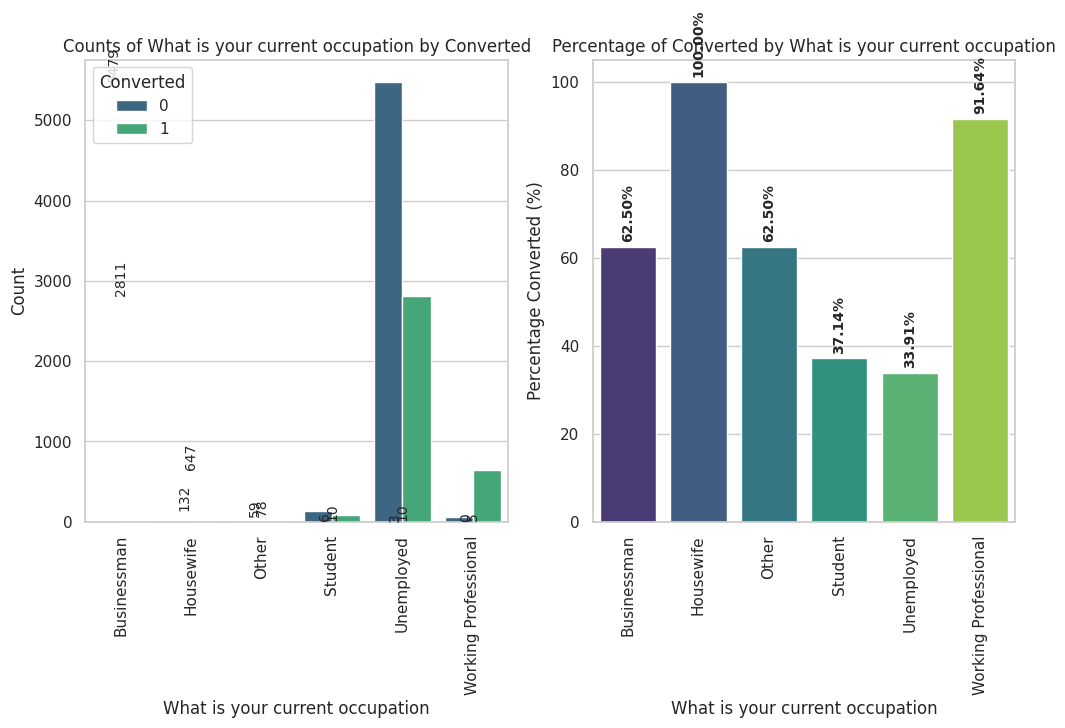

In [63]:
bivariate_analysis(df_dropped, 'What is your current occupation')

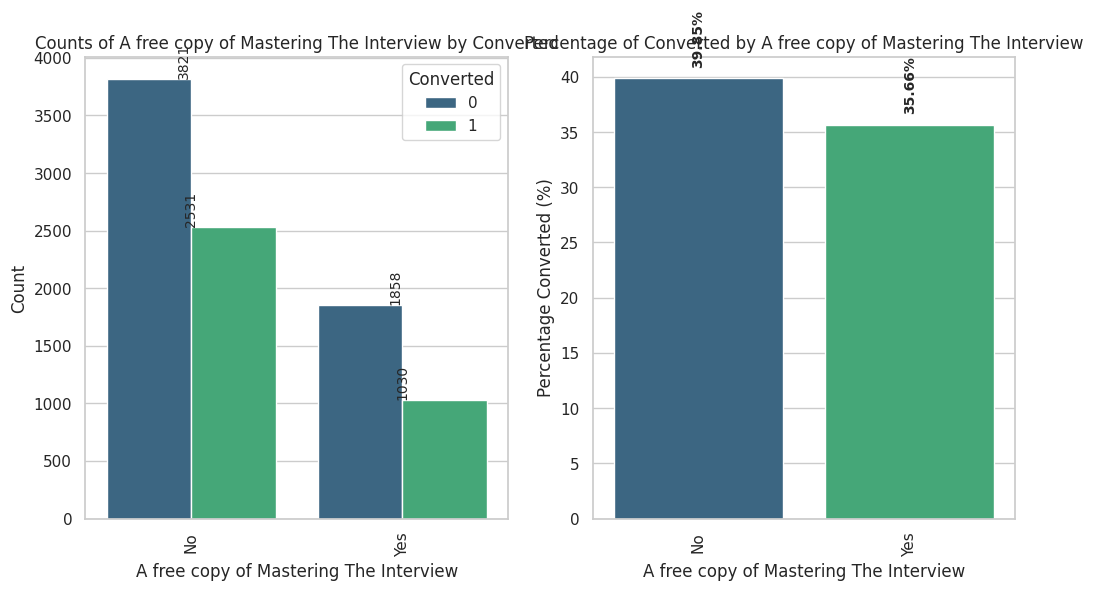

In [64]:
bivariate_analysis(df_dropped, 'A free copy of Mastering The Interview')

In [65]:
bivariate_analysis(df_dropped, 'Last Notable Activity')

The column 'Last Notable Activity' does not exist in the DataFrame.


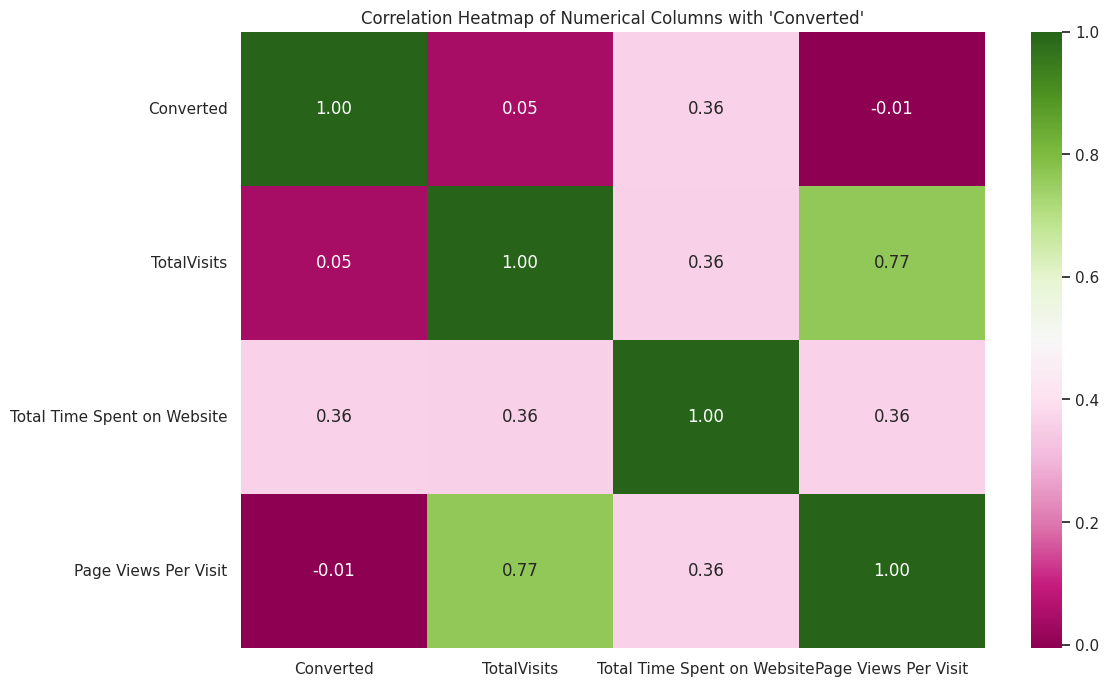

Correlation with 'Converted' column:
Converted                      1.000000
Total Time Spent on Website    0.362483
TotalVisits                    0.045568
Page Views Per Visit          -0.005289
Name: Converted, dtype: float64


In [66]:
# Function to calculate correlation
def correlation_heatmap(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate correlation matrix
    corr_matrix = df[numerical_columns].corr()

    # Calculate correlation with 'Converted' column
    corr_with_target = corr_matrix['Converted'].sort_values(ascending=False)

    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="PiYG", fmt=".2f")
    plt.title("Correlation Heatmap of Numerical Columns with 'Converted'")
    plt.show()

    # Display correlation with 'Converted' column
    print("Correlation with 'Converted' column:")
    print(corr_with_target)

# Call the function
correlation_heatmap(df_dropped)

**Inferences:**


*   'Total Time Spent on Website' has Weak correlation of 0.36 with 'Converted'.
*   'TotalVisits' and 'Page Views per Visit' are moderately correlated with correlation of .75



# **3. Data Preparation for Training**

In [67]:
# Checking data
lead_df = df_dropped.copy()
pd.set_option('display.max_columns', None)
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [68]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True'
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                       False                 False               False   
1                       False                 False               False   
2                        True                 False               False   
3                        True                 False               False   
4                       False                 False                True   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                    True                       False                  False   
1                   False                        True                  False   
2                   False                       False                  False   
3                   False                       False                  False   
4                   False                       False                  False   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                            False                        False   
1                            False                        False   
2                            False                        False   
3                            False                        False   
4                             True                        False   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                             False                       False   
1                             False                        True   
2                             False                        True   
3                             False                       False   
4                             False                       False   

   Last Activity_Form Submitted on Website  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   Last Activity_Olark Chat Conversation  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                   True                   False   
1                                  False                   False   
2                                  False                   False   
3                                  False                   False   
4                                  False                   False   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                      False                       False   
1                      False                       

In [69]:
# Convert all "True" from "dummy" to 1 and "False" from "dummy" to 0
dummy = dummy.applymap(lambda x: 1 if x == True else 0)
dummy

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
...                                   ...                        ...   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9238                                    1                          0   
9239                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
9235                        0                           0   
9236                        0                           0   
9237                        0                           0   
9238                        0                           0   
9239                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
0                          1                           0   
1                          0                           1   
2                          0                           0   
3                          0                           0   
4                          0                           0   
...                      ...                         ...   
9235                       0                           0   
9236                       0                           0   
9237                       0                           0   
9238                       0                           0   
9239                       0                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   
...                     ...                         ...   
9235                      0                           0   
9236                      0                           0   
9237                      0                           0   
9238                      0                           0   
9239                      0                           0   

      Lead Source_Welingak Website  Last 

In [70]:
categorical_cols = [col for col in lead_df.columns if lead_df[col].dtype == "category"]
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']


In [71]:
# Adding dummy variables dataset 'dummy' to original dataset 'df_dropped'
lead_df = pd.concat([dummy,df_dropped],axis = 1)

# Dropping repeated columns for which dummy variables were created
lead_df .drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization', ],axis = 1,inplace = True)

# Checking shape of 'lead_df' dataframe
lead_df .shape

(9240, 51)

In [72]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis=1)
# Putting response variable to y
y = lead_df['Converted']

In [73]:
# Replace 'Yes' with 1 and 'No' with 0 for the specified columns
X['Do Not Email'] = lead_df['Do Not Email'].replace({'Yes': 1, 'No': 0})
X['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].replace({'Yes': 1, 'No': 0})

# Convert the columns to 'int64' data type
X[['Do Not Email', 'A free copy of Mastering The Interview']] = X[['Do Not Email', 'A free copy of Mastering The Interview']].astype('int64')

# Verify the data types after conversion
print(X[['Do Not Email', 'A free copy of Mastering The Interview']].dtypes)
X[['Do Not Email', 'A free copy of Mastering The Interview']].head()

Do Not Email                              int64
A free copy of Mastering The Interview    int64
dtype: object


Do Not Email  A free copy of Mastering The Interview
0             0                                       0
1             0                                       0
2             0                                       1
3             0                                       0
4             0                                       0

In [74]:
# Normalising Data
scaler = StandardScaler()
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                       

In [75]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Flatten the correlation matrix to identify unique pairs
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Remove pairs with correlation of 1 (self-correlation) and duplicate pairs
correlation_pairs = correlation_pairs[correlation_pairs < 1].drop_duplicates()

# Extract the top 10 pairs
top10_correlation_pairs = correlation_pairs.head(10)

print("Top 10 pairs with highest correlation:")
print(top10_correlation_pairs)

Top 10 pairs with highest correlation:
Lead Source_Facebook                 Lead Origin_Lead Import                   0.981709
Lead Source_Reference                Lead Origin_Lead Add Form                 0.853237
TotalVisits                          Page Views Per Visit                      0.767585
Do Not Email                         Last Activity_Email Bounced               0.618470
Lead Source_Direct Traffic           A free copy of Mastering The Interview    0.598655
Lead Origin_Landing Page Submission  A free copy of Mastering The Interview    0.569633
Page Views Per Visit                 Lead Origin_Landing Page Submission       0.553423
Lead Origin_Landing Page Submission  Lead Source_Direct Traffic                0.528303
Lead Source_Olark Chat               Specialization_Others                     0.498951
Lead Origin_Landing Page Submission  TotalVisits                               0.453501
dtype: float64


In [76]:
# Columsn that are having high correlation
cols_to_drop_2 = ['Lead Source_Facebook', 'Lead Origin_Lead Add Form', 'TotalVisits' , 'Last Activity_Email Bounced', 'A free copy of Mastering The Interview','Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat']


In [77]:
# Drop unwanted columns from 'X'
X.drop(cols_to_drop_2, axis=1, inplace=True)

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

# **4. Model Building**

In [79]:
# Function for logistic regression
def logistic_regression_summary(X_train, y_train):
    # Add constant to X_train
    X_train_with_const = sm.add_constant(X_train)

    # Create and fit the logistic regression model
    logit_model = sm.GLM(y_train, X_train_with_const, family=sm.families.Binomial())
    logit_result = logit_model.fit()

    # Get summary of the model
    summary = logit_result.summary()

    # Extract p-values for features
    p_values = logit_result.pvalues.drop("const")  # Drop the constant column
    top_5_features = p_values.nlargest(5)  # Get top 5 features with highest p-values

    return summary, top_5_features, logit_result

In [80]:
# Function for feature selection based on RFE
def select_top_features_rfe(X_train, y_train, n_features=15):
    # Create a logistic regression model
    logreg = LogisticRegression()

    # Initialize RFE
    rfe = RFE(logreg, n_features_to_select=n_features)

    # Fit RFE
    rfe.fit(X_train, y_train)

    # Get the selected features
    selected_features_mask = rfe.support_
    selected_features = X_train.columns[selected_features_mask]
    not_selected_features = X_train.columns[~selected_features_mask]

    return selected_features[:n_features], selected_features, not_selected_features


In [81]:
# Funcition to calculate VIF
def calculate_vif(df):
    # Create a DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

    # Add interpretation of VIF values to a new column
    def interpret_vif(vif):
        if vif == 1:
            return "No multicollinearity. The variance of the coefficient estimates is not inflated."
        elif vif < 5:
            return "Moderate multicollinearity. The variance of the coefficient estimates is slightly inflated."
        else:
            return "High multicollinearity. The variance of the coefficient estimates is significantly inflated, and the variable should be examined further."

    vif_data["VIF Interpretation"] = vif_data["VIF"].apply(interpret_vif)

    return vif_data

**4.1 Model 1**

In [82]:
# Get model details
model_1_summary, top_5_features, model_1 = logistic_regression_summary(X_train, y_train)
print(model_1_summary)
print(f'\n\n\n\n\n\nTop 5 Features with highest p-value:\n_____________________________________________________________________\n{top_5_features}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6886
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.6
Date:                Tue, 21 May 2024   Deviance:                       5837.1
Time:                        13:20:56   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [83]:
# Top 15 features selected by RFE
top_features, all_selected_features, not_selected_features = select_top_features_rfe(X_train, y_train, n_features=15)
print("Top 15 features selected by RFE:", top_features)

Top 15 features selected by RFE: Index(['Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')


In [84]:
# Features not selected by RFE
print("Features not selected by RFE:", not_selected_features)

Features not selected by RFE: Index(['Lead Origin_Quick Add Form', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail M

**4.2 Model 2**

In [85]:
# Create X_train_RFE DataFrame with selected features
X_train_RFE = X_train.loc[:, all_selected_features]

In [86]:
# Get model details
model_2_summary, top_5_features, model_2 = logistic_regression_summary(X_train_RFE, y_train)
print(model_2_summary)
print(f'\n\n\n\n\n\nTop 5 Features with highest p-value:\n_____________________________________________________________________\n{top_5_features}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2971.0
Date:                Tue, 21 May 2024   Deviance:                       5942.0
Time:                        13:21:01   Pearson chi2:                 7.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [87]:
X_train_RFE.columns

Index(['Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [88]:
vif_RFE = calculate_vif(X_train_RFE)
vif_RFE


Variable       VIF  \
0                             Lead Origin_Lead Import  1.003039   
1                          Lead Source_Direct Traffic  1.293851   
2                                  Lead Source_Google  1.295126   
3                          Lead Source_Organic Search  1.138555   
4                               Lead Source_Reference  1.169359   
5                          Lead Source_Referral Sites  1.006948   
6                        Lead Source_Welingak Website  1.028323   
7                     Last Activity_Converted to Lead  1.111079   
8               Last Activity_Olark Chat Conversation  1.076431   
9                              Last Activity_SMS Sent  1.487471   
10                         Last Activity_Unsubscribed  1.079520   
11          What is your current occupation_Housewife  1.006605   
12  What is your current occupation_Working Profes...  1.174771   
13                                       Do Not Email  1.189002   
14                        Total Time Spent on Website  1.146433   

                                   VIF Interpretation  
0   Moderate multicollinearity. The variance of th...  
1   Moderate multicollinearity. The variance of th...  
2   Moderate multicollinearity. The variance of th...  
3   Moderate multicollinearity. The variance of th...  
4   Moderate multicollinearity. The variance of th...  
5   Moderate multicollinearity. The variance of th...  
6   Moderate multicollinearity. The variance of th...  
7   Moderate multicollinearity. The variance of th...  
8   Moderate multicollinearity. The variance of th...  
9   Moderate multicollinearity. The variance of th...  
10  Moderate multicollinearity. The variance of th...  
11  Moderate multicollinearity. The variance of th...  
12  Moderate multicollinearity. The variance of th...  
13  Moderate multicollinearity. The variance of th...  
14  Moderate multicollinearity. The variance of th...

**4.3 Model 3**

In [89]:
#Dropping 'What is your current occupation_Housewife' and 'What is your current occupation_Student' because of high p-value(p>0.05)
X_train_3 = X_train_RFE.drop(["What is your current occupation_Housewife"], axis = 1)


In [90]:
# Get model details
model_3_summary, top_5_features, model_3 = logistic_regression_summary(X_train_3, y_train)
print(model_3_summary)
print(f'\n\n\n\n\n\nTop 5 Features with highest p-value:\n_____________________________________________________________________\n{top_5_features}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6915
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.8
Date:                Tue, 21 May 2024   Deviance:                       5955.7
Time:                        13:21:02   Pearson chi2:                 7.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3761
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [91]:
vif_3 = calculate_vif(X_train_3)
vif_3

Variable       VIF  \
0                             Lead Origin_Lead Import  1.003037   
1                          Lead Source_Direct Traffic  1.293183   
2                                  Lead Source_Google  1.293580   
3                          Lead Source_Organic Search  1.137983   
4                               Lead Source_Reference  1.162837   
5                          Lead Source_Referral Sites  1.006943   
6                        Lead Source_Welingak Website  1.028299   
7                     Last Activity_Converted to Lead  1.110933   
8               Last Activity_Olark Chat Conversation  1.076405   
9                              Last Activity_SMS Sent  1.486212   
10                         Last Activity_Unsubscribed  1.079519   
11  What is your current occupation_Working Profes...  1.174130   
12                                       Do Not Email  1.188902   
13                        Total Time Spent on Website  1.146416   

                                   VIF Interpretation  
0   Moderate multicollinearity. The variance of th...  
1   Moderate multicollinearity. The variance of th...  
2   Moderate multicollinearity. The variance of th...  
3   Moderate multicollinearity. The variance of th...  
4   Moderate multicollinearity. The variance of th...  
5   Moderate multicollinearity. The variance of th...  
6   Moderate multicollinearity. The variance of th...  
7   Moderate multicollinearity. The variance of th...  
8   Moderate multicollinearity. The variance of th...  
9   Moderate multicollinearity. The variance of th...  
10  Moderate multicollinearity. The variance of th...  
11  Moderate multicollinearity. The variance of th...  
12  Moderate multicollinearity. The variance of th...  
13  Moderate multicollinearity. The variance of th...

**Inference:**
 'model_3' will be the final model as we can see that P-valuesand VIF values are in acceptable range .

# **5. Evaluate Model**

In [132]:
# Calculating predicted values of 'y_train':
y_train_pred = model_3.predict(sm.add_constant(X_train_3))

# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:5] # Displaying 5 values

array([0.1320922 , 0.19858569, 0.06897865, 0.08754243, 0.89797094])

In [133]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID
0        0      0.132092     6205
1        1      0.198586     1294
2        0      0.068979     7629
3        1      0.087542     7456
4        1      0.897971     5346

In [134]:
y_train_pred = model_3.predict(sm.add_constant(X_train_3)).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted
0        0      0.132092     6205          0
1        1      0.198586     1294          0
2        0      0.068979     7629          0
3        1      0.087542     7456          0
4        1      0.897971     5346          1

In [135]:
# Find count of unique values in 'predicted' column in y_train
y_train_pred_final['predicted'].value_counts()


predicted
0    4575
1    2355
Name: count, dtype: int64

In [136]:
def evaluate_classification(y_true, y_pred):
    # Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))

    # Calculate Accuracy
    accuracy = (TP + TN) / len(y_true)

    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity
    specificity = TN / (TN + FP)

    # Calculate Precision
    precision = TP / (TP + FP)

    # Prepare data for tabulation
    data = [
        ["True Positive (TP)", TP],
        ["True Negative (TN)", TN],
        ["False Positive (FP)", FP],
        ["False Negative (FN)", FN],
        ["Accuracy", accuracy],
        ["Sensitivity (Recall)", sensitivity],
        ["Specificity", specificity],
        ["Precision", precision]
    ]

    # Display the evaluation metrics in tabular format
    print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

In [137]:
# Evaluate classification on train data
evaluate_classification(y_train_pred_final.Convert, y_train_pred_final.predicted)

╒══════════════════════╤═════════════╕
│ Metric               │       Value │
╞══════════════════════╪═════════════╡
│ True Positive (TP)   │ 1837        │
├──────────────────────┼─────────────┤
│ True Negative (TN)   │ 3757        │
├──────────────────────┼─────────────┤
│ False Positive (FP)  │  518        │
├──────────────────────┼─────────────┤
│ False Negative (FN)  │  818        │
├──────────────────────┼─────────────┤
│ Accuracy             │    0.807215 │
├──────────────────────┼─────────────┤
│ Sensitivity (Recall) │    0.691902 │
├──────────────────────┼─────────────┤
│ Specificity          │    0.87883  │
├──────────────────────┼─────────────┤
│ Precision            │    0.780042 │
╘══════════════════════╧═════════════╛


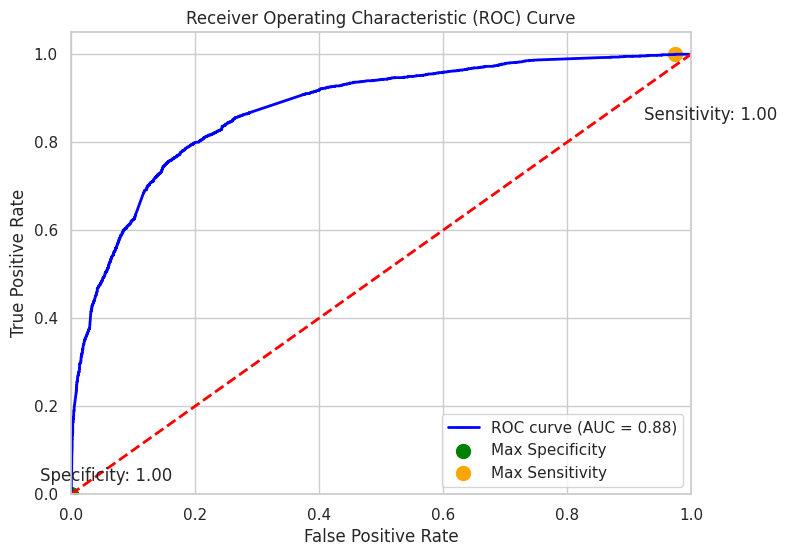

In [138]:
# Function to draw ROC draw
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")  # Set seaborn style for better aesthetics

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

    # Annotate the point on the ROC curve where sensitivity and specificity are maximum
    max_sensitivity_index = tpr.argmax()
    max_specificity_index = (1 - fpr).argmax()
    plt.scatter(fpr[max_specificity_index], tpr[max_specificity_index], color='green', s=100, label='Max Specificity')
    plt.scatter(fpr[max_sensitivity_index], tpr[max_sensitivity_index], color='orange', s=100, label='Max Sensitivity')
    plt.text(fpr[max_specificity_index] - 0.05, tpr[max_specificity_index] + 0.03, f'Specificity: {1 - fpr[max_specificity_index]:.2f}')
    plt.text(fpr[max_sensitivity_index] - 0.05, tpr[max_sensitivity_index] - 0.15, f'Sensitivity: {tpr[max_sensitivity_index]:.2f}')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate=False)
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [139]:

# Function to evaluate model performance
def calculate_scores(y_true, y_pred):
    accu_score = accuracy_score(y_true, y_pred)
    sens_score = recall_score(y_true, y_pred)
    specificity_score = accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    preci_score = precision_score(y_true, y_pred)
    return accu_score, sens_score, specificity_score, preci_score

# Predicting Convert status with different probability cutoffs
cutoffs = [float(x)/100 for x in range(1, 100)]
results = []

for cutoff in cutoffs:
    y_train_pred_final[cutoff] = (y_train_pred_final.Convert_Prob > cutoff).astype(int)

# Calculating accuracy, sensitivity, specificity, and precision for various probability cutoffs from 0.1 to 0.9.
df = pd.DataFrame(columns=['probability_score', 'accu_score', 'sensitivity_score', 'specificity_score', 'precision_score'])

for cutoff in cutoffs:
    y_pred = y_train_pred_final[cutoff]
    accu, sensi, speci, preci = calculate_scores(y_train_pred_final.Convert, y_pred)
    df.loc[cutoff] = [cutoff, accu, sensi, speci, preci]


df

probability_score  accu_score  sensitivity_score  specificity_score  \
0.01               0.01    0.383838           1.000000           0.383838   
0.02               0.02    0.388167           1.000000           0.388167   
0.03               0.03    0.410245           0.998493           0.410245   
0.04               0.04    0.434921           0.995480           0.434921   
0.05               0.05    0.451948           0.993974           0.451948   
...                 ...         ...                ...                ...   
0.95               0.95    0.680808           0.173258           0.680808   
0.96               0.96    0.677056           0.161582           0.677056   
0.97               0.97    0.666089           0.131827           0.666089   
0.98               0.98    0.658874           0.112618           0.658874   
0.99               0.99    0.637374           0.055367           0.637374   

      precision_score  
0.01         0.383394  
0.02         0.385062  
0.03         0.393674  
0.04         0.403696  
0.05         0.410995  
...               ...  
0.95         0.964361  
0.96         0.972789  
0.97         0.974930  
0.98         0.973941  
0.99         0.967105  

[99 rows x 5 columns]

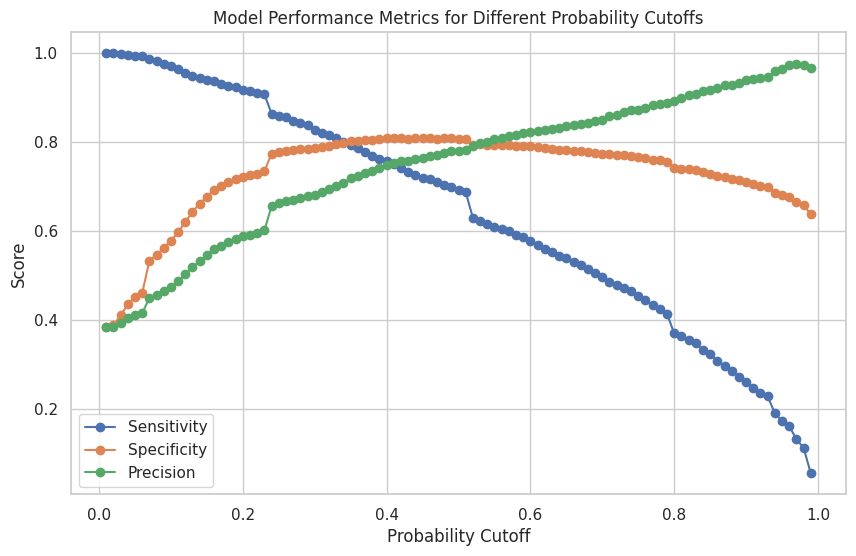

In [140]:
#  'probability_score' vs Scores

# Plotting graph
plt.figure(figsize=(10, 6))
#plt.plot(df['probability_score'], df['accu_score'], label='Accuracy', marker='o')

plt.plot(df['probability_score'], df['sensitivity_score'], label='Sensitivity', marker='o')
plt.plot(df['probability_score'], df['specificity_score'], label='Specificity', marker='o')
plt.plot(df['probability_score'], df['precision_score'], label='Precision', marker='o')
plt.title('Model Performance Metrics for Different Probability Cutoffs')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [141]:

# For Sensitivity-Specificity-Accuracy Score
sens_spec_acc_dist = df.apply(lambda x: distance.euclidean((x['sensitivity_score'], x['specificity_score'], x['accu_score']), (1, 1, 1)), axis=1)
optimal_cutoff_sens_spec_acc = df.loc[sens_spec_acc_dist.idxmin(), 'probability_score']

# For Precision-Recall Curve
prec_recall_dist = df.apply(lambda x: distance.euclidean((x['precision_score'], x['sensitivity_score']), (1, 1)), axis=1)
optimal_cutoff_prec_recall = df.loc[prec_recall_dist.idxmin(), 'probability_score']

# 0.35 looks to be Overall optimum point
overall_optimal_cutoff = 0.35

print("Optimal Cutoff for Sensitivity-Specificity-Accuracy Score:", optimal_cutoff_sens_spec_acc)
print("Optimal Cutoff for Precision-Recall Curve:", optimal_cutoff_prec_recall)
print("Overall Optimal Cutoff:", overall_optimal_cutoff)

Optimal Cutoff for Sensitivity-Specificity-Accuracy Score: 0.26
Optimal Cutoff for Precision-Recall Curve: 0.36
Overall Optimal Cutoff: 0.35


In [155]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Prospect ID  Converted  Convert_Prob  Convert_predicted  Lead_Score
0             1          1      0.283701                  0          28
1             2          0      0.742791                  1          74
2             3          1      0.639924                  1          64
3             4          0      0.905645                  1          91
4             5          0      0.077280                  0           8
5             6          1      0.189045                  0          19
6             7          0      0.581156                  1          58
7             8          1      0.840259                  1          84
8             9          0      0.605588                  1          61
9            10          0      0.542637                  1          54
10           11          0      0.125402                  0          13
11           12          0      0.432583                  1          43
12           13          0      0.248031                  0          25
13           14          0      0.419839                  1          42
14           15          0      0.596968                  1          60
15           16          1      0.182039                  0          18
16           17          0      0.283356                  0          28
17           18          1      0.006678                  0           1
18           19          0      0.910678                  1          91
19           20          1      0.705137                  1          71

In [143]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Convert  Convert_Prob  Pros_ID  Convert_predicted  Lead_Score
0         0      0.132092     6205                  0          13
1         1      0.198586     1294                  0          20
2         0      0.068979     7629                  0           7
3         1      0.087542     7456                  0           9
4         1      0.897971     5346                  1          90
5         1      0.513576     5526                  1          51
6         0      0.178630     3636                  0          18
7         0      0.068979     5166                  0           7
8         0      0.157735     6775                  0          16
9         0      0.068979     4236                  0           7
10        1      0.243561     6117                  0          24
11        0      0.302063     8965                  0          30
12        0      0.068979     3208                  0           7
13        0      0.378502      569                  1          38
14        0      0.068979     7436                  0           7
15        0      0.350153      815                  1          35
16        0      0.162940     7589                  0          16
17        1      0.420169      715                  1          42
18        0      0.186814     6668                  0          19
19        0      0.064667     7318                  0           6

In [144]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x < 0.65 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(60)

Convert  Convert_Prob  Pros_ID  Convert_predicted  Lead_Score
0         0      0.132092     6205                  1          13
1         1      0.198586     1294                  1          20
2         0      0.068979     7629                  1           7
3         1      0.087542     7456                  1           9
4         1      0.897971     5346                  0          90
5         1      0.513576     5526                  1          51
6         0      0.178630     3636                  1          18
7         0      0.068979     5166                  1           7
8         0      0.157735     6775                  1          16
9         0      0.068979     4236                  1           7
10        1      0.243561     6117                  1          24
11        0      0.302063     8965                  1          30
12        0      0.068979     3208                  1           7
13        0      0.378502      569                  1          38
14        0      0.068979     7436                  1           7
15        0      0.350153      815                  1          35
16        0      0.162940     7589                  1          16
17        1      0.420169      715                  1          42
18        0      0.186814     6668                  1          19
19        0      0.064667     7318                  1           6
20        0      0.213392      440                  1          21
21        1      0.068979     9040                  1           7
22        0      0.076224     9058                  1           8
23        0      0.097768     3659                  1          10
24        0      0.179299     4720                  1          18
25        0      0.513576     7514                  1          51
26        0      0.132379     1592                  1          13
27        1      0.384864     7837                  1          38
28        1      0.443916     2723                  1          44
29        1      0.880327     9022                  0          88
30        1      0.792433     6579                  0          79
31        0      0.373646     8525                  1          37
32        0      0.141916      798                  1          14
33        0      0.513576     4214                  1          51
34        0      0.125855     8414                  1          13
35        0      0.094414     5228                  1           9
36        0      0.039078     6891                  1           4
37        1      0.299623     7314                  1          30
38        0      0.068979     6083                  1           7
39        0      0.240723     7484                  1          24
40        0      0.036729     1870                  1           4
41        0      0.129455     6659                  1          13
42        0      0.068979      285                  1           7
43        1      0.513576     1666                  1          51
44        1      0.792864     4444                  0          79
45        0      0.139811     4695                  1          14
46        1      0.964793     7552                  0          96
47        1      0.995724     3723                  0         100
48        1      0.387314     5860                  1          39
49        1      0.995724     5807                  0         100
50        1      0.131273     4113                  1          13
51        0      0.513576     5358                  1          51
52        1      0.513576     2081                  1          51
53        1      0.930825     6126                  0          93
54        0      0.068979     1087                  1           7
55        0      0.336479     6695                  1          34
56        0      0.273552     2213                  1          27
57        0      0.211257     1636                  1          21
58        1      0.942313     6157                  0          94
59        0      0.134774     3145          

In [146]:
# Evaluating model performance on training data on cut off probability
evaluate_classification(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

╒══════════════════════╤══════════════╕
│ Metric               │        Value │
╞══════════════════════╪══════════════╡
│ True Positive (TP)   │ 1225         │
├──────────────────────┼──────────────┤
│ True Negative (TN)   │  280         │
├──────────────────────┼──────────────┤
│ False Positive (FP)  │ 3995         │
├──────────────────────┼──────────────┤
│ False Negative (FN)  │ 1430         │
├──────────────────────┼──────────────┤
│ Accuracy             │    0.217172  │
├──────────────────────┼──────────────┤
│ Sensitivity (Recall) │    0.461394  │
├──────────────────────┼──────────────┤
│ Specificity          │    0.0654971 │
├──────────────────────┼──────────────┤
│ Precision            │    0.234674  │
╘══════════════════════╧══════════════╛


In [147]:
# Getting the predicted values on the test set on cut off probability
X_test_sm = sm.add_constant( X_test.loc[:, X_train_3.columns])
y_test_pred = model_3.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))


In [148]:
# Evaluating model performance on test data
evaluate_classification(y_predicted_final.Converted, y_predicted_final.final_predicted)

╒══════════════════════╤═════════════╕
│ Metric               │       Value │
╞══════════════════════╪═════════════╡
│ True Positive (TP)   │  714        │
├──────────────────────┼─────────────┤
│ True Negative (TN)   │ 1144        │
├──────────────────────┼─────────────┤
│ False Positive (FP)  │  260        │
├──────────────────────┼─────────────┤
│ False Negative (FN)  │  192        │
├──────────────────────┼─────────────┤
│ Accuracy             │    0.804329 │
├──────────────────────┼─────────────┤
│ Sensitivity (Recall) │    0.788079 │
├──────────────────────┼─────────────┤
│ Specificity          │    0.814815 │
├──────────────────────┼─────────────┤
│ Precision            │    0.73306  │
╘══════════════════════╧═════════════╛


In [149]:
model_3.params

const                                                  -0.260093
Lead Origin_Lead Import                                -1.371679
Lead Source_Direct Traffic                             -1.307420
Lead Source_Google                                     -0.921376
Lead Source_Organic Search                             -1.083223
Lead Source_Reference                                   2.545115
Lead Source_Referral Sites                             -1.190135
Lead Source_Welingak Website                            4.468967
Last Activity_Converted to Lead                        -1.208157
Last Activity_Olark Chat Conversation                  -1.399644
Last Activity_SMS Sent                                  1.257157
Last Activity_Unsubscribed                              1.074337
What is your current occupation_Working Professional    2.851091
Do Not Email                                           -1.449473
Total Time Spent on Website                             1.059300
dtype: float64

In [150]:

def cutoff_model(X_train, y_train, X_test, y_test, cutoff=0.35):
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    model = logm.fit()

    y_train_pred = model.predict(X_train_sm).values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Prospect ID': y_train.index, 'Converted': y_train.values, 'Convert_Probability': y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x * 100))
    print("------------------Result of training data-------------------")
    print(tabulate(y_train_pred_final.head(), headers='keys', tablefmt='fancy_grid'))

    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = model.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID': y_test.index, 'Converted': y_test.values, 'Convert_Probability': y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x * 100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(tabulate(y_test_pred_final.head(), headers='keys', tablefmt='fancy_grid'))

    # Model Evaluation Metrics
    print("------------------Model Evaluation Metrics Test Data-------------------")
    metrics = evaluate_classification(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted)
    return model


In [151]:
model = cutoff_model(X_train.loc[:, X_train_3.columns], y_train, X_test.loc[:, X_train_3.columns], y_test, cutoff=0.35)

------------------Result of training data-------------------
╒════╤═══════════════╤═════════════╤═══════════════════════╤═════════════════════╤══════════════╕
│    │   Prospect ID │   Converted │   Convert_Probability │   Convert_predicted │   Lead_Score │
╞════╪═══════════════╪═════════════╪═══════════════════════╪═════════════════════╪══════════════╡
│  0 │          6205 │           0 │             0.132092  │                   0 │           13 │
├────┼───────────────┼─────────────┼───────────────────────┼─────────────────────┼──────────────┤
│  1 │          1294 │           1 │             0.198586  │                   0 │           20 │
├────┼───────────────┼─────────────┼───────────────────────┼─────────────────────┼──────────────┤
│  2 │          7629 │           0 │             0.0689786 │                   0 │            7 │
├────┼───────────────┼─────────────┼───────────────────────┼─────────────────────┼──────────────┤
│  3 │          7456 │           1 │             0.087542

In [152]:
print("Feature Importance")
print(model.params)

Feature Importance
const                                                  -0.260093
Lead Origin_Lead Import                                -1.371679
Lead Source_Direct Traffic                             -1.307420
Lead Source_Google                                     -0.921376
Lead Source_Organic Search                             -1.083223
Lead Source_Reference                                   2.545115
Lead Source_Referral Sites                             -1.190135
Lead Source_Welingak Website                            4.468967
Last Activity_Converted to Lead                        -1.208157
Last Activity_Olark Chat Conversation                  -1.399644
Last Activity_SMS Sent                                  1.257157
Last Activity_Unsubscribed                              1.074337
What is your current occupation_Working Professional    2.851091
Do Not Email                                           -1.449473
Total Time Spent on Website                             1.059300
dtype:

# **Subjective Question 1**
Lead Source_Welingak Website, What is your current occupation_Working Professional, Lead Source_Reference

# **Subjective Question 2**
Lead Source_Welingak Website, Lead Source_Reference, Last Activity_Olark Chat Conversation

# **Subjective Question 3**

In [156]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Prospect ID  Converted  Convert_Prob  Convert_predicted  Lead_Score
0             1          1      0.283701                  0          28
1             2          0      0.742791                  1          74
2             3          1      0.639924                  1          64
3             4          0      0.905645                  1          91
4             5          0      0.077280                  0           8
5             6          1      0.189045                  0          19
6             7          0      0.581156                  1          58
7             8          1      0.840259                  1          84
8             9          0      0.605588                  1          61
9            10          0      0.542637                  1          54
10           11          0      0.125402                  0          13
11           12          0      0.432583                  1          43
12           13          0      0.248031                  0          25
13           14          0      0.419839                  1          42
14           15          0      0.596968                  1          60
15           16          1      0.182039                  0          18
16           17          0      0.283356                  0          28
17           18          1      0.006678                  0           1
18           19          0      0.910678                  1          91
19           20          1      0.705137                  1          71

# **Subjective Question 4**

In [154]:

# Sample data (for demonstration purposes)
data = {
    'Prospect ID': np.arange(1, 101),
    'Converted': np.random.randint(0, 2, size=100),
    'Convert_Prob': np.random.rand(100)
}
y_train_pred_final = pd.DataFrame(data)

# Original code
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x * 100))
print("Original DataFrame with Convert_predicted and Lead_Score:")
print(y_train_pred_final.head())

# Create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)

print("\nDataFrame with additional columns for different probability cutoffs:")
y_train_pred_final.head(20)


Original DataFrame with Convert_predicted and Lead_Score:
   Prospect ID  Converted  Convert_Prob  Convert_predicted  Lead_Score
0            1          1      0.283701                  0          28
1            2          0      0.742791                  1          74
2            3          1      0.639924                  1          64
3            4          0      0.905645                  1          91
4            5          0      0.077280                  0           8

DataFrame with additional columns for different probability cutoffs:


Prospect ID  Converted  Convert_Prob  Convert_predicted  Lead_Score  0.0  \
0             1          1      0.283701                  0          28    1   
1             2          0      0.742791                  1          74    1   
2             3          1      0.639924                  1          64    1   
3             4          0      0.905645                  1          91    1   
4             5          0      0.077280                  0           8    1   
5             6          1      0.189045                  0          19    1   
6             7          0      0.581156                  1          58    1   
7             8          1      0.840259                  1          84    1   
8             9          0      0.605588                  1          61    1   
9            10          0      0.542637                  1          54    1   
10           11          0      0.125402                  0          13    1   
11           12          0      0.432583                  1          43    1   
12           13          0      0.248031                  0          25    1   
13           14          0      0.419839                  1          42    1   
14           15          0      0.596968                  1          60    1   
15           16          1      0.182039                  0          18    1   
16           17          0      0.283356                  0          28    1   
17           18          1      0.006678                  0           1    1   
18           19          0      0.910678                  1          91    1   
19           20          1      0.705137                  1          71    1   

    0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0     1    1    0    0    0    0    0    0    0  
1     1    1    1    1    1    1    1    0    0  
2     1    1    1    1    1    1    0    0    0  
3     1    1    1    1    1    1    1    1    1  
4     0    0    0    0    0    0    0    0    0  
5     1    0    0    0    0    0    0    0    0  
6     1    1    1    1    1    0    0    0    0  
7     1    1    1    1    1    1    1    1    0  
8     1    1    1    1    1    1    0    0    0  
9     1    1    1    1    1    0    0    0    0  
10    1    0    0    0    0    0    0    0    0  
11    1    1    1    1    0    0    0    0    0  
12    1    1    0    0    0    0    0    0    0  
13    1    1    1    1    0    0    0    0    0  
14    1    1    1    1    1    0    0    0    0  
15    1    0    0    0    0    0    0    0    0  
16    1    1    0    0    0    0    0    0    0  
17    0    0    0    0    0    0    0    0    0  
18    1    1    1    1    1    1    1    1    1  
19    1    1    1    1    1    1    1    0    0